<a href="https://colab.research.google.com/github/LUISMPACA/consulta-resultados-cepreuna/blob/main/ENFERMEDADES_CARDIOVASCULARES_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICCION DE ENFERMEDADES CARDIOVASCULARES**
**Análisis Exploratorio de Datos**
“PREDICCIÓN DE ENFERMEDADES CARDIOVASCULARES MEDIANTE
MODELOS DE CLASIFICACIÓN BASADOS EN INTELIGENCIA ARTIFICIAL 2025”


1.   Valerio Gomez
2.   Luis Miguel Musaja
3.   Luis Fernando Talizo

**LIMPIEZA DE DATASET**

PRIMERO. visualizamos valores ausentes

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive/')

PATH ='gdrive/MyDrive/cardiovasculares/'

df = pd.read_excel(PATH + 'dataset.xlsx')


print(df.describe())

print(df.info())

print(df.head())

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
              male          age    education  currentSmoker   cigsPerDay  \
count  1570.000000  1570.000000  1526.000000    1570.000000  1561.000000   
mean      0.462420    50.980255     1.933814       0.494268     9.491352   
std       0.498745     8.626902     1.014749       0.500126    12.416803   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    44.000000     1.000000       0.000000     0.000000   
50%       0.000000    51.000000     2.000000       0.000000     0.000000   
75%       1.000000    58.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  1546.000000      1570.000000   1570.000000  1570.000000  1552.000000   
mean      0.034929      

**Descripción de lo que deseas hacer:**

Tenemos un dataset en inglés, con columnas como male, age, education, etc.

*   Renombrar las columnas al español.
*   Convertir al tipo de dato adecuado (entero, flotante o categórico).



In [15]:
df.rename(columns={
    'male': 'sexo',  # 1:Hombre, 0:Mujer
    'age': 'edad',
    'education': 'educacion',  # 1 al 4
    'currentSmoker': 'fuma_actualmente',
    'cigsPerDay': 'cigarrillos_dia',
    'BPMeds': 'medicacion_presion',
    'prevalentStroke': 'ha_tenido_acv',
    'prevalentHyp': 'hipertension_diagnosticada',
    'diabetes': 'diabetes',
    'totChol': 'colesterol_total',
    'sysBP': 'presion_sistolica',
    'diaBP': 'presion_diastolica',
    'BMI': 'imc',
    'heartRate': 'frecuencia_cardiaca',
    'glucose': 'glucosa',
    'TenYearCHD': 'riesgo_coronario_10_años'
}, inplace=True)

print(list(df.columns))

listaEntero = [
    'sexo', 'edad', 'educacion', 'fuma_actualmente',
    'cigarrillos_dia', 'medicacion_presion',
    'ha_tenido_acv', 'hipertension_diagnosticada', 'diabetes',
    'colesterol_total', 'frecuencia_cardiaca', 'glucosa',
    'riesgo_coronario_10_años'
]

listaFlotante = [
    'presion_sistolica', 'presion_diastolica', 'imc'
]

for col in listaEntero:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

for col in listaFlotante:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.describe())

print(df.info())

print(df.head())

['sexo', 'edad', 'educacion', 'fuma_actualmente', 'cigarrillos_dia', 'medicacion_presion', 'ha_tenido_acv', 'hipertension_diagnosticada', 'diabetes', 'colesterol_total', 'presion_sistolica', 'presion_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa', 'riesgo_coronario_10_años']
           sexo       edad  educacion  fuma_actualmente  cigarrillos_dia  \
count    1570.0     1570.0     1526.0            1570.0           1561.0   
mean    0.46242  50.980255   1.933814          0.494268         9.491352   
std    0.498745   8.626902   1.014749          0.500126        12.416803   
min         0.0       32.0        1.0               0.0              0.0   
25%         0.0       44.0        1.0               0.0              0.0   
50%         0.0       51.0        2.0               0.0              0.0   
75%         1.0       58.0        3.0               1.0             20.0   
max         1.0       70.0        4.0               1.0             70.0   

       medicacion_presion  ha_ten

In [16]:
df.groupby('sexo')[['edad', 'imc', 'presion_sistolica', 'glucosa']].describe()

edad                                                       imc  \
      count       mean       std   min   25%   50%   75%   max  count   
sexo                                                                    
0     844.0  51.277251  8.787131  32.0  44.0  51.0  59.0  70.0  836.0   
1     726.0  50.634986  8.429691  33.0  44.0  50.0  57.0  69.0  724.0   

                 ... presion_sistolica        glucosa                        \
           mean  ...               75%    max   count       mean        std   
sexo             ...                                                          
0     25.790957  ...             150.0  295.0   743.0  84.401077  30.421001   
1     26.462583  ...             145.0  235.0   672.0  84.116071  30.960552   

                                     
       min   25%   50%   75%    max  
sexo                                 
0     40.0  72.0  78.0  87.0  394.0  
1     43.0  71.0  78.0  88.0  394.0  

[2 rows x 32 columns]

**Eliminacion de valores nulos**

In [17]:
df_limpio = df.dropna()

print(df_limpio.describe())
print(df_limpio.info())

print(df_limpio.head())

           sexo       edad  educacion  fuma_actualmente  cigarrillos_dia  \
count    1332.0     1332.0     1332.0            1332.0           1332.0   
mean   0.475225  50.936186   1.925676          0.495495         9.561562   
std    0.499573   8.619408   1.015153          0.500167        12.399557   
min         0.0       32.0        1.0               0.0              0.0   
25%         0.0       44.0        1.0               0.0              0.0   
50%         0.0       51.0        2.0               0.0              0.0   
75%         1.0       58.0        3.0               1.0             20.0   
max         1.0       69.0        4.0               1.0             70.0   

       medicacion_presion  ha_tenido_acv  hipertension_diagnosticada  \
count              1332.0         1332.0                      1332.0   
mean             0.036036       0.009009                    0.362613   
std               0.18645       0.094523                    0.480935   
min                   0.0  

verificacion de cuantos valores nulos hay antes:

eliminacion de fila con valores nulos:

Verificar si quedan valores nulos:

**HISTOGRAMAS**

Mostrando gráfico de torta de: sexo


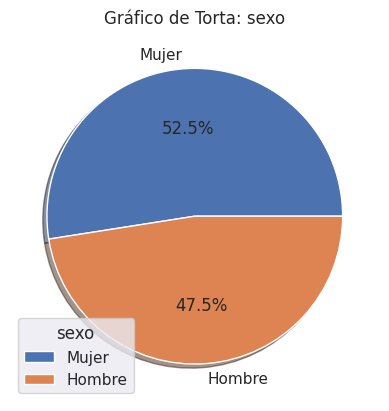

Mostrando histograma de: edad


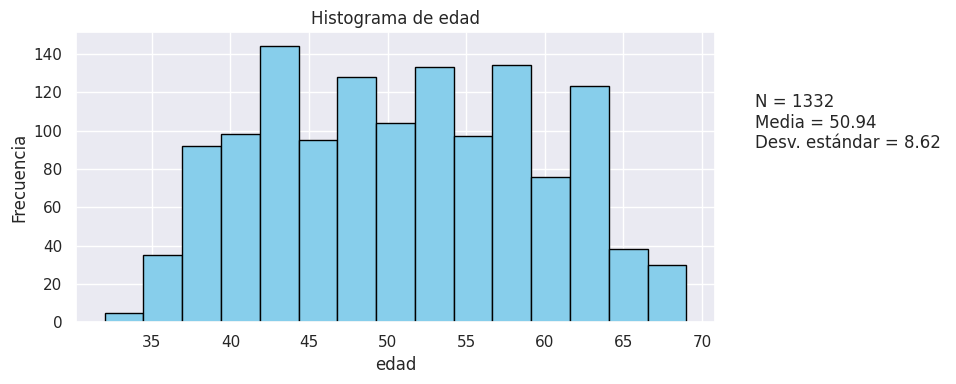

Mostrando gráfico de torta de: educacion


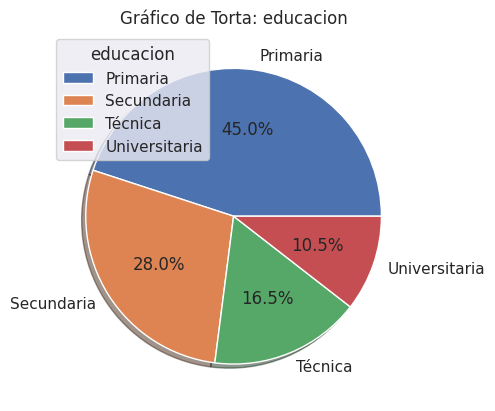

Mostrando gráfico de torta de: fuma_actualmente


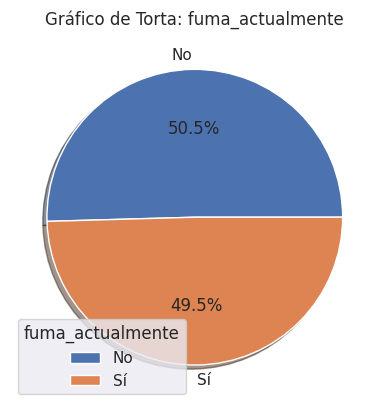

Mostrando histograma de: cigarrillos_dia


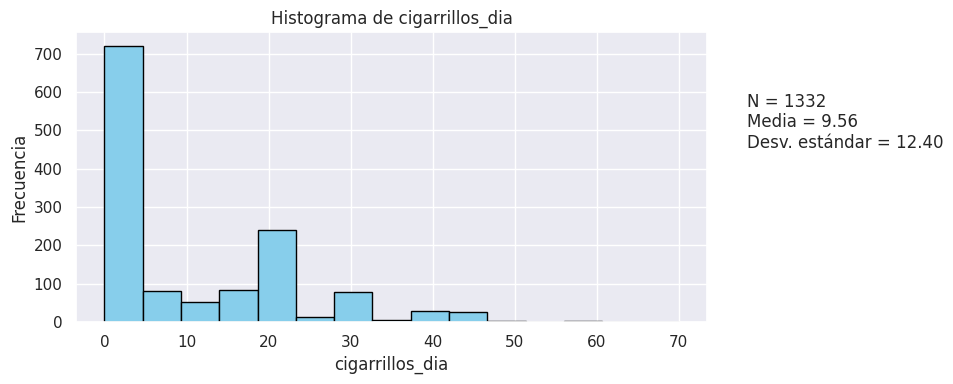

Mostrando gráfico de torta de: medicacion_presion


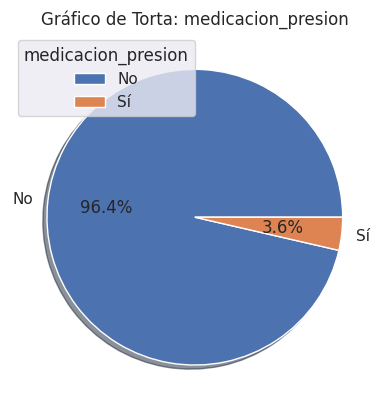

Mostrando gráfico de torta de: ha_tenido_acv


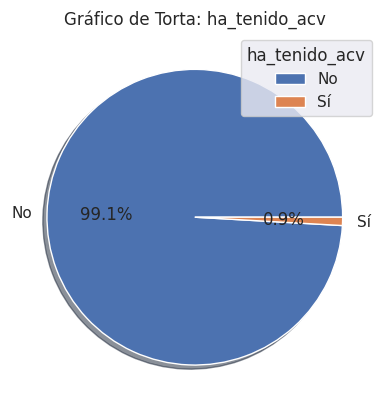

Mostrando gráfico de torta de: hipertension_diagnosticada


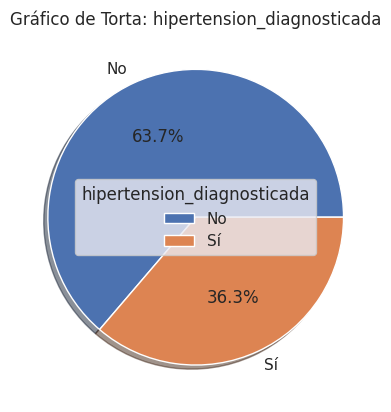

Mostrando gráfico de torta de: diabetes


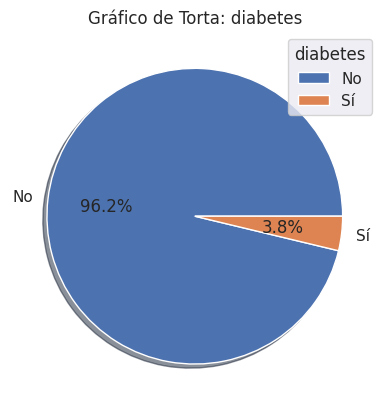

Mostrando histograma de: colesterol_total


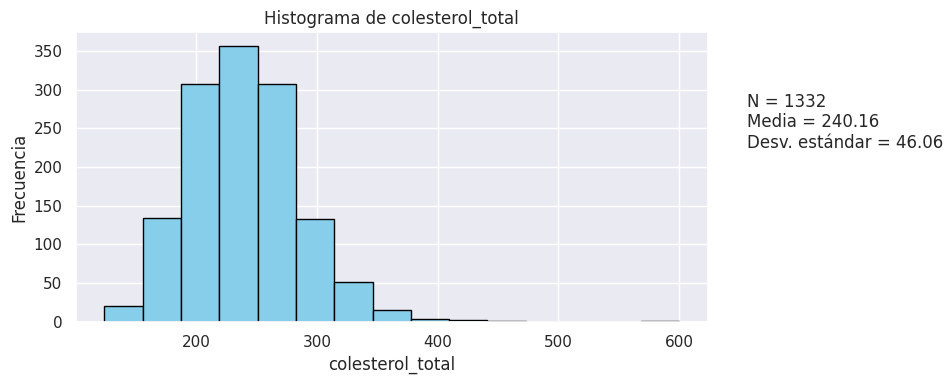

Mostrando histograma de: presion_sistolica


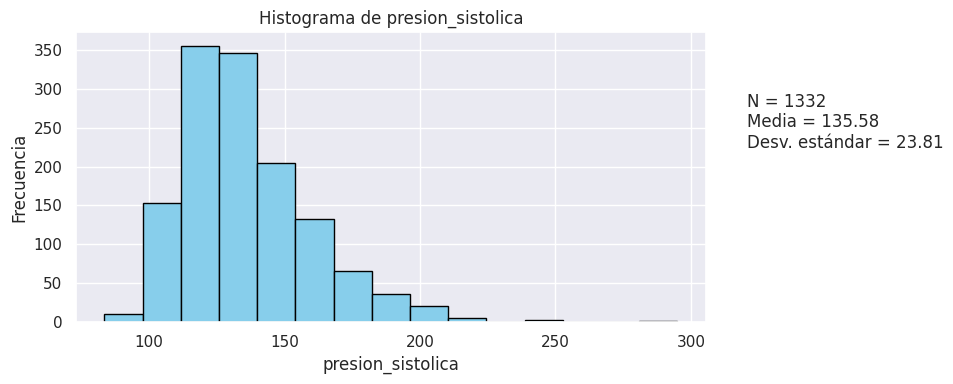

Mostrando histograma de: presion_diastolica


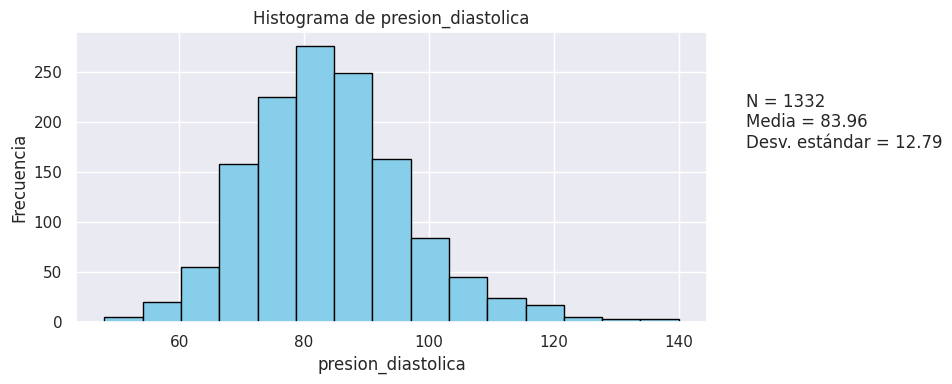

Mostrando histograma de: imc


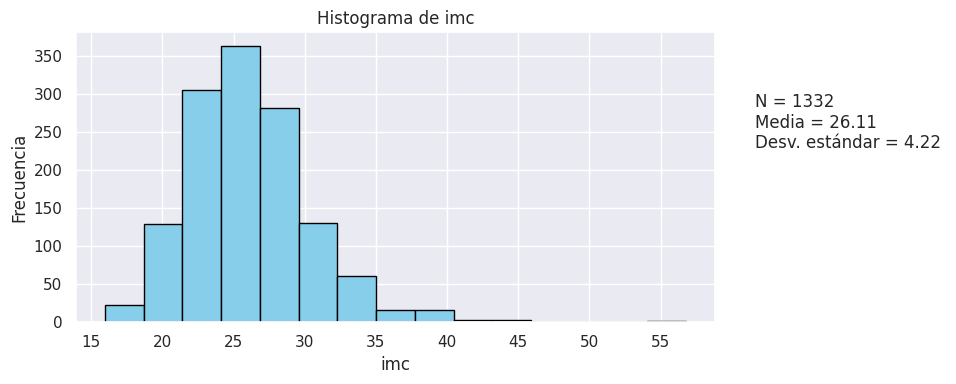

Mostrando histograma de: frecuencia_cardiaca


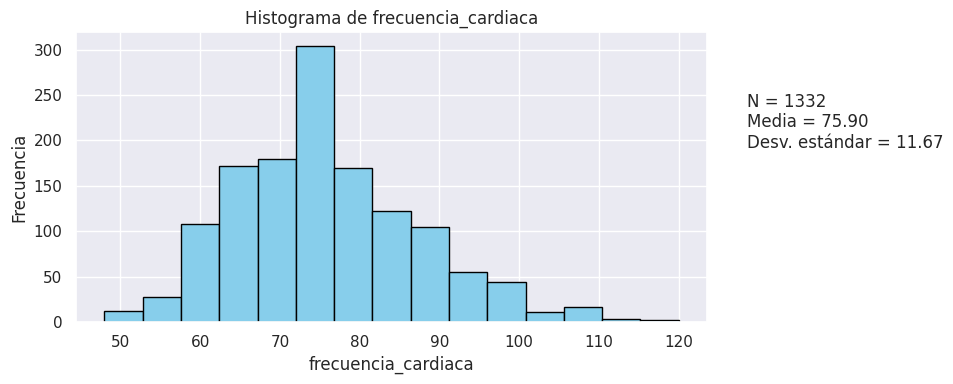

Mostrando histograma de: glucosa


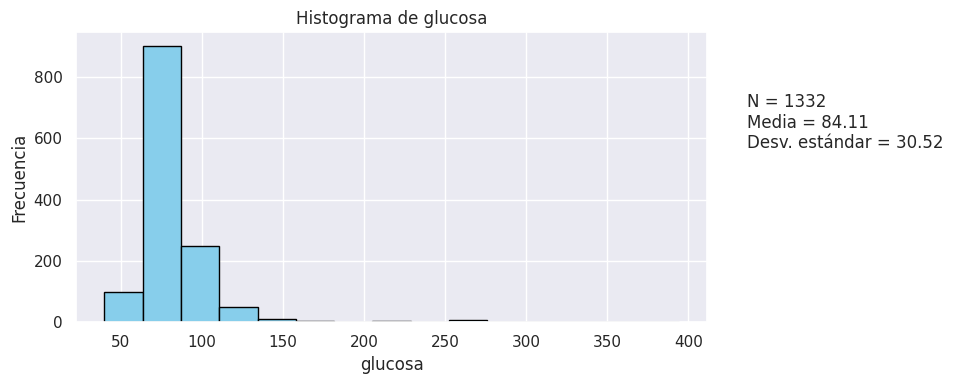

Mostrando gráfico de torta de: riesgo_coronario_10_años


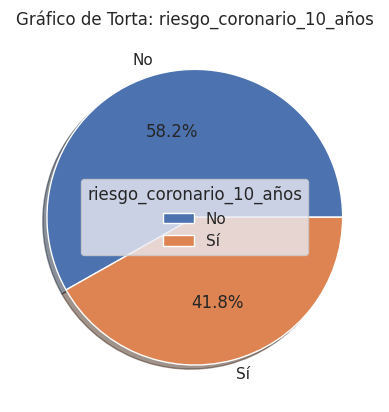

In [18]:
df_viz = df_limpio.copy()

df_viz['sexo'] = df_viz['sexo'].map({1: 'Hombre', 0: 'Mujer'})
df_viz['fuma_actualmente'] = df_viz['fuma_actualmente'].map({1: 'Sí', 0: 'No'})
df_viz['medicacion_presion'] = df_viz['medicacion_presion'].map({1: 'Sí', 0: 'No'})
df_viz['ha_tenido_acv'] = df_viz['ha_tenido_acv'].map({1: 'Sí', 0: 'No'})
df_viz['hipertension_diagnosticada'] = df_viz['hipertension_diagnosticada'].map({1: 'Sí', 0: 'No'})
df_viz['diabetes'] = df_viz['diabetes'].map({1: 'Sí', 0: 'No'})
df_viz['riesgo_coronario_10_años'] = df_viz['riesgo_coronario_10_años'].map({1: 'Sí', 0: 'No'})
df_viz['educacion'] = df_viz['educacion'].map({
    1: 'Primaria', 2: 'Secundaria', 3: 'Técnica', 4: 'Universitaria'
})


listaCategorico = [
    'sexo', 'fuma_actualmente', 'medicacion_presion',
    'ha_tenido_acv', 'hipertension_diagnosticada', 'diabetes',
    'educacion', 'riesgo_coronario_10_años'
]

listaNumerico = [
    'edad', 'cigarrillos_dia', 'colesterol_total', 'presion_sistolica',
    'presion_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa'
]

for col in df_viz.columns:
    if col in listaNumerico:
        print('Mostrando histograma de:', col)

        datos = df_viz[col].dropna()
        media = datos.mean()
        desviacion = datos.std()
        conteo = datos.count()

        fig, ax = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [3, 1]})

        ax[0].hist(datos, bins=15, color='skyblue', edgecolor='black')
        ax[0].set_title(f'Histograma de {col}')
        ax[0].set_xlabel(col)
        ax[0].set_ylabel('Frecuencia')
        ax[0].grid(True)

        texto = f'N = {conteo}\nMedia = {media:.2f}\nDesv. estándar = {desviacion:.2f}'
        ax[1].axis('off')
        ax[1].text(0.1, 0.6, texto, fontsize=12)

        plt.tight_layout()
        plt.show()

    elif col in listaCategorico:
        print('Mostrando gráfico de torta de:', col)
        valores = df_viz[col].value_counts()
        etiquetas = valores.index
        plt.title(f'Gráfico de Torta: {col}')
        plt.pie(valores, labels=etiquetas, shadow=True, autopct='%1.1f%%')
        plt.legend(title=col)
        plt.show()


**BOXPLOTS**

Mostrando boxplot de: edad


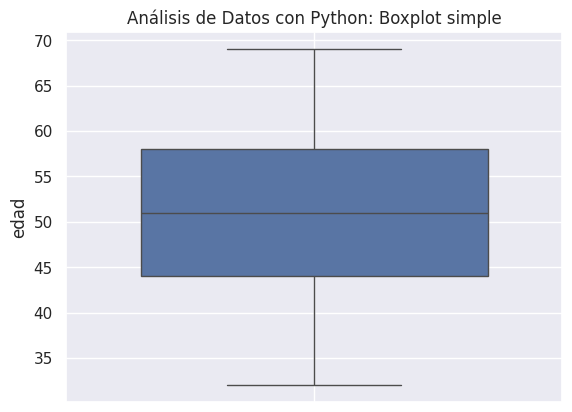

Mostrando boxplot de: cigarrillos_dia


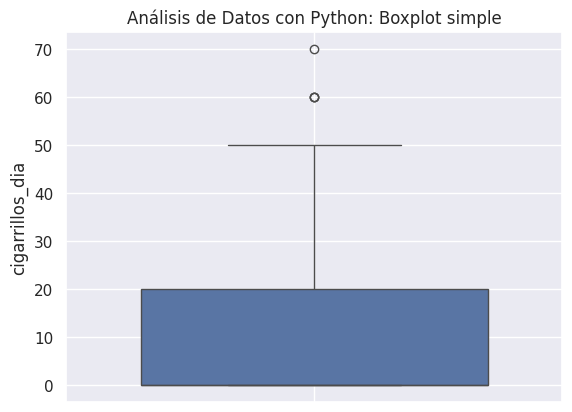

Mostrando boxplot de: colesterol_total


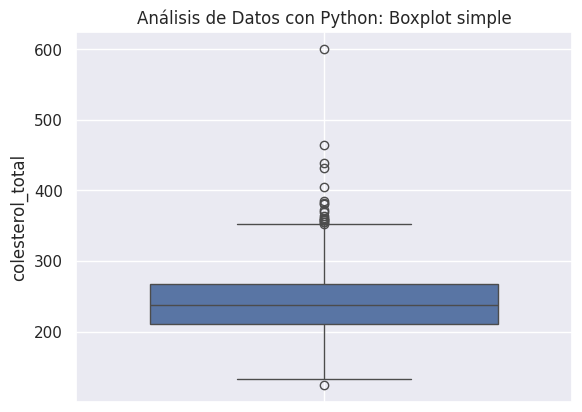

Mostrando boxplot de: presion_sistolica


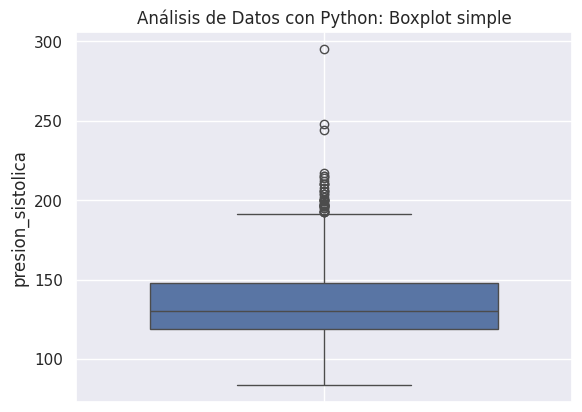

Mostrando boxplot de: presion_diastolica


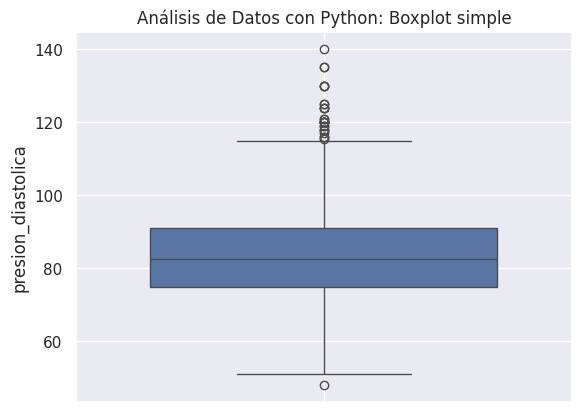

Mostrando boxplot de: imc


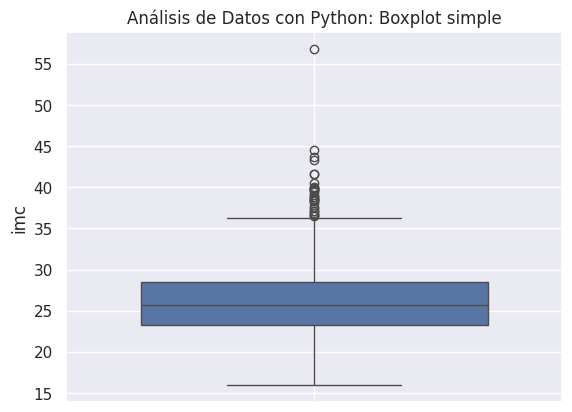

Mostrando boxplot de: frecuencia_cardiaca


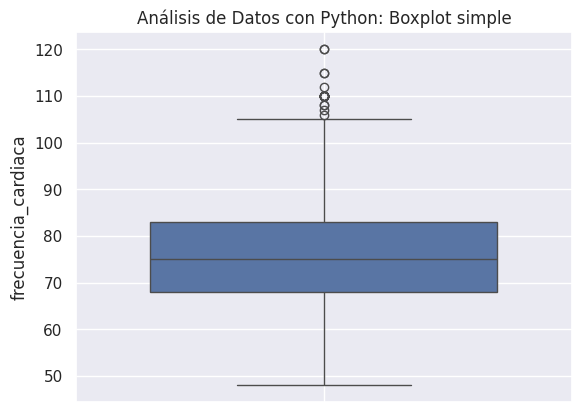

Mostrando boxplot de: glucosa


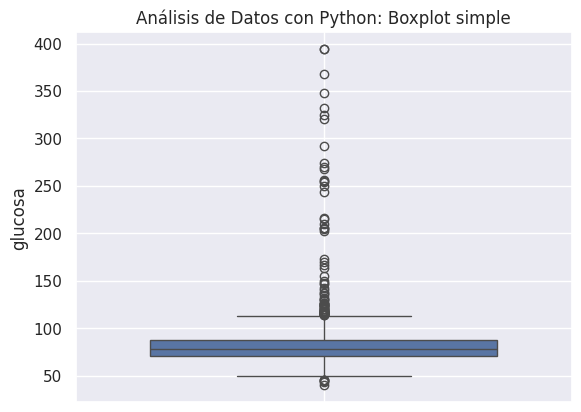

Mostrando boxplot de: edad


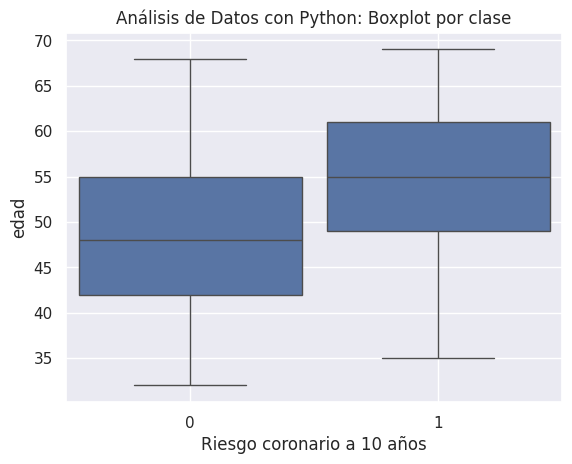

Mostrando boxplot de: cigarrillos_dia


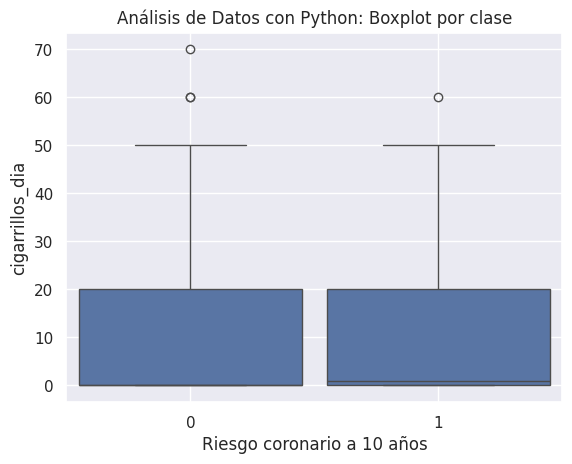

Mostrando boxplot de: colesterol_total


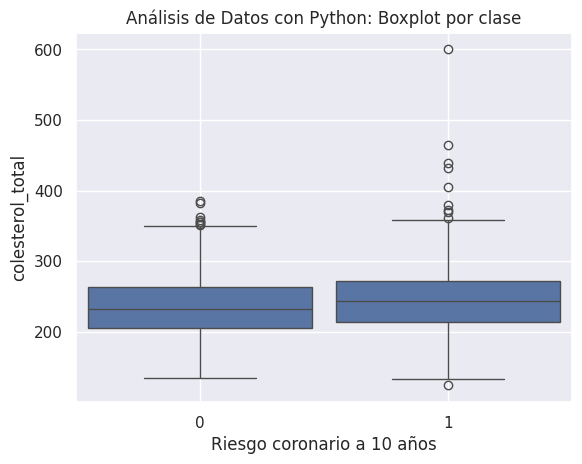

Mostrando boxplot de: presion_sistolica


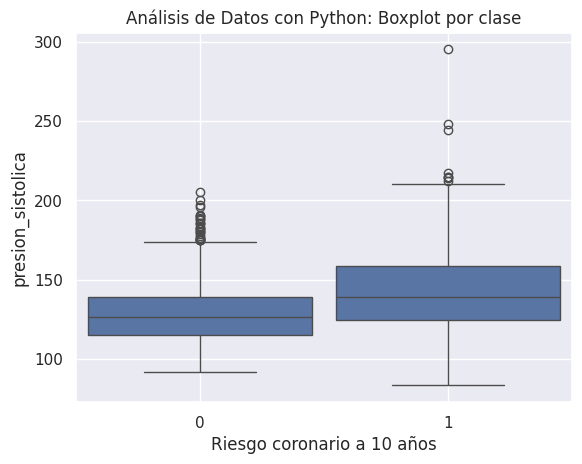

Mostrando boxplot de: presion_diastolica


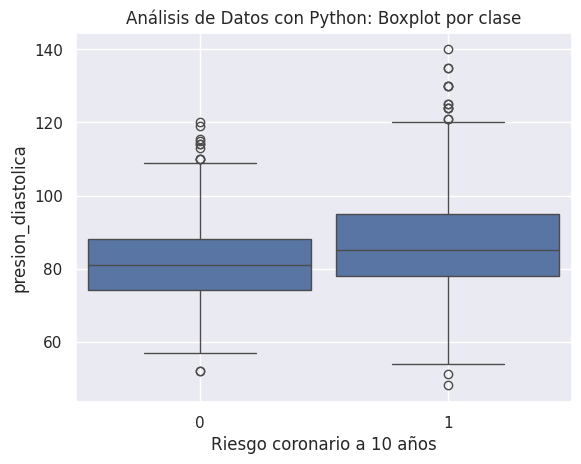

Mostrando boxplot de: imc


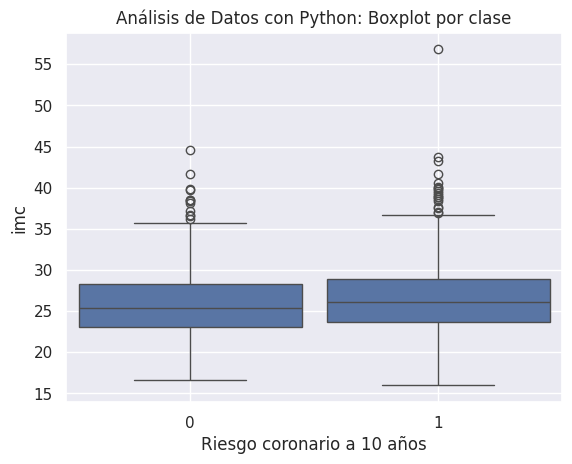

Mostrando boxplot de: frecuencia_cardiaca


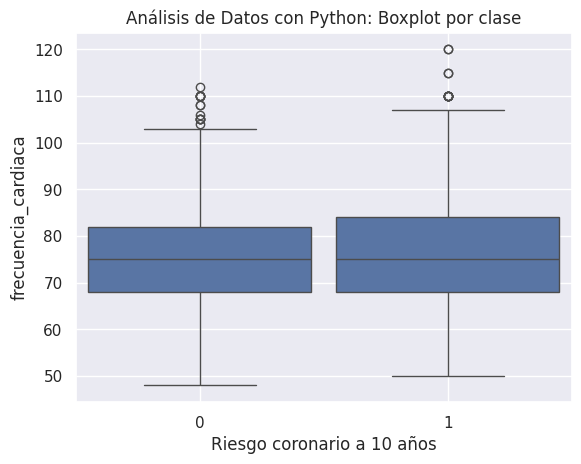

Mostrando boxplot de: glucosa


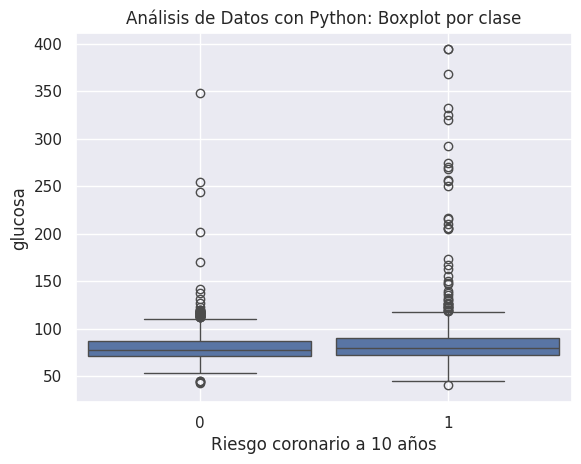

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

listaNumerico = [
    'edad', 'cigarrillos_dia', 'colesterol_total', 'presion_sistolica',
    'presion_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa'
]

for col in df_limpio.columns:
    if col in listaNumerico:
        print('Mostrando boxplot de:', col)

        sns.set()
        sns.boxplot(y=df_limpio[col], width=0.7)

        plt.ylabel(col)
        plt.title('Análisis de Datos con Python: Boxplot simple')
        plt.grid(True)
        plt.show()

for col in df_limpio.columns:
    if col in listaNumerico:
        print('Mostrando boxplot de:', col)

        sns.set()
        sns.boxplot(x=df_limpio['riesgo_coronario_10_años'], y=df_limpio[col], width=0.9)

        plt.ylabel(col)
        plt.xlabel('Riesgo coronario a 10 años')
        plt.title('Análisis de Datos con Python: Boxplot por clase')
        plt.grid(True)
        plt.show()


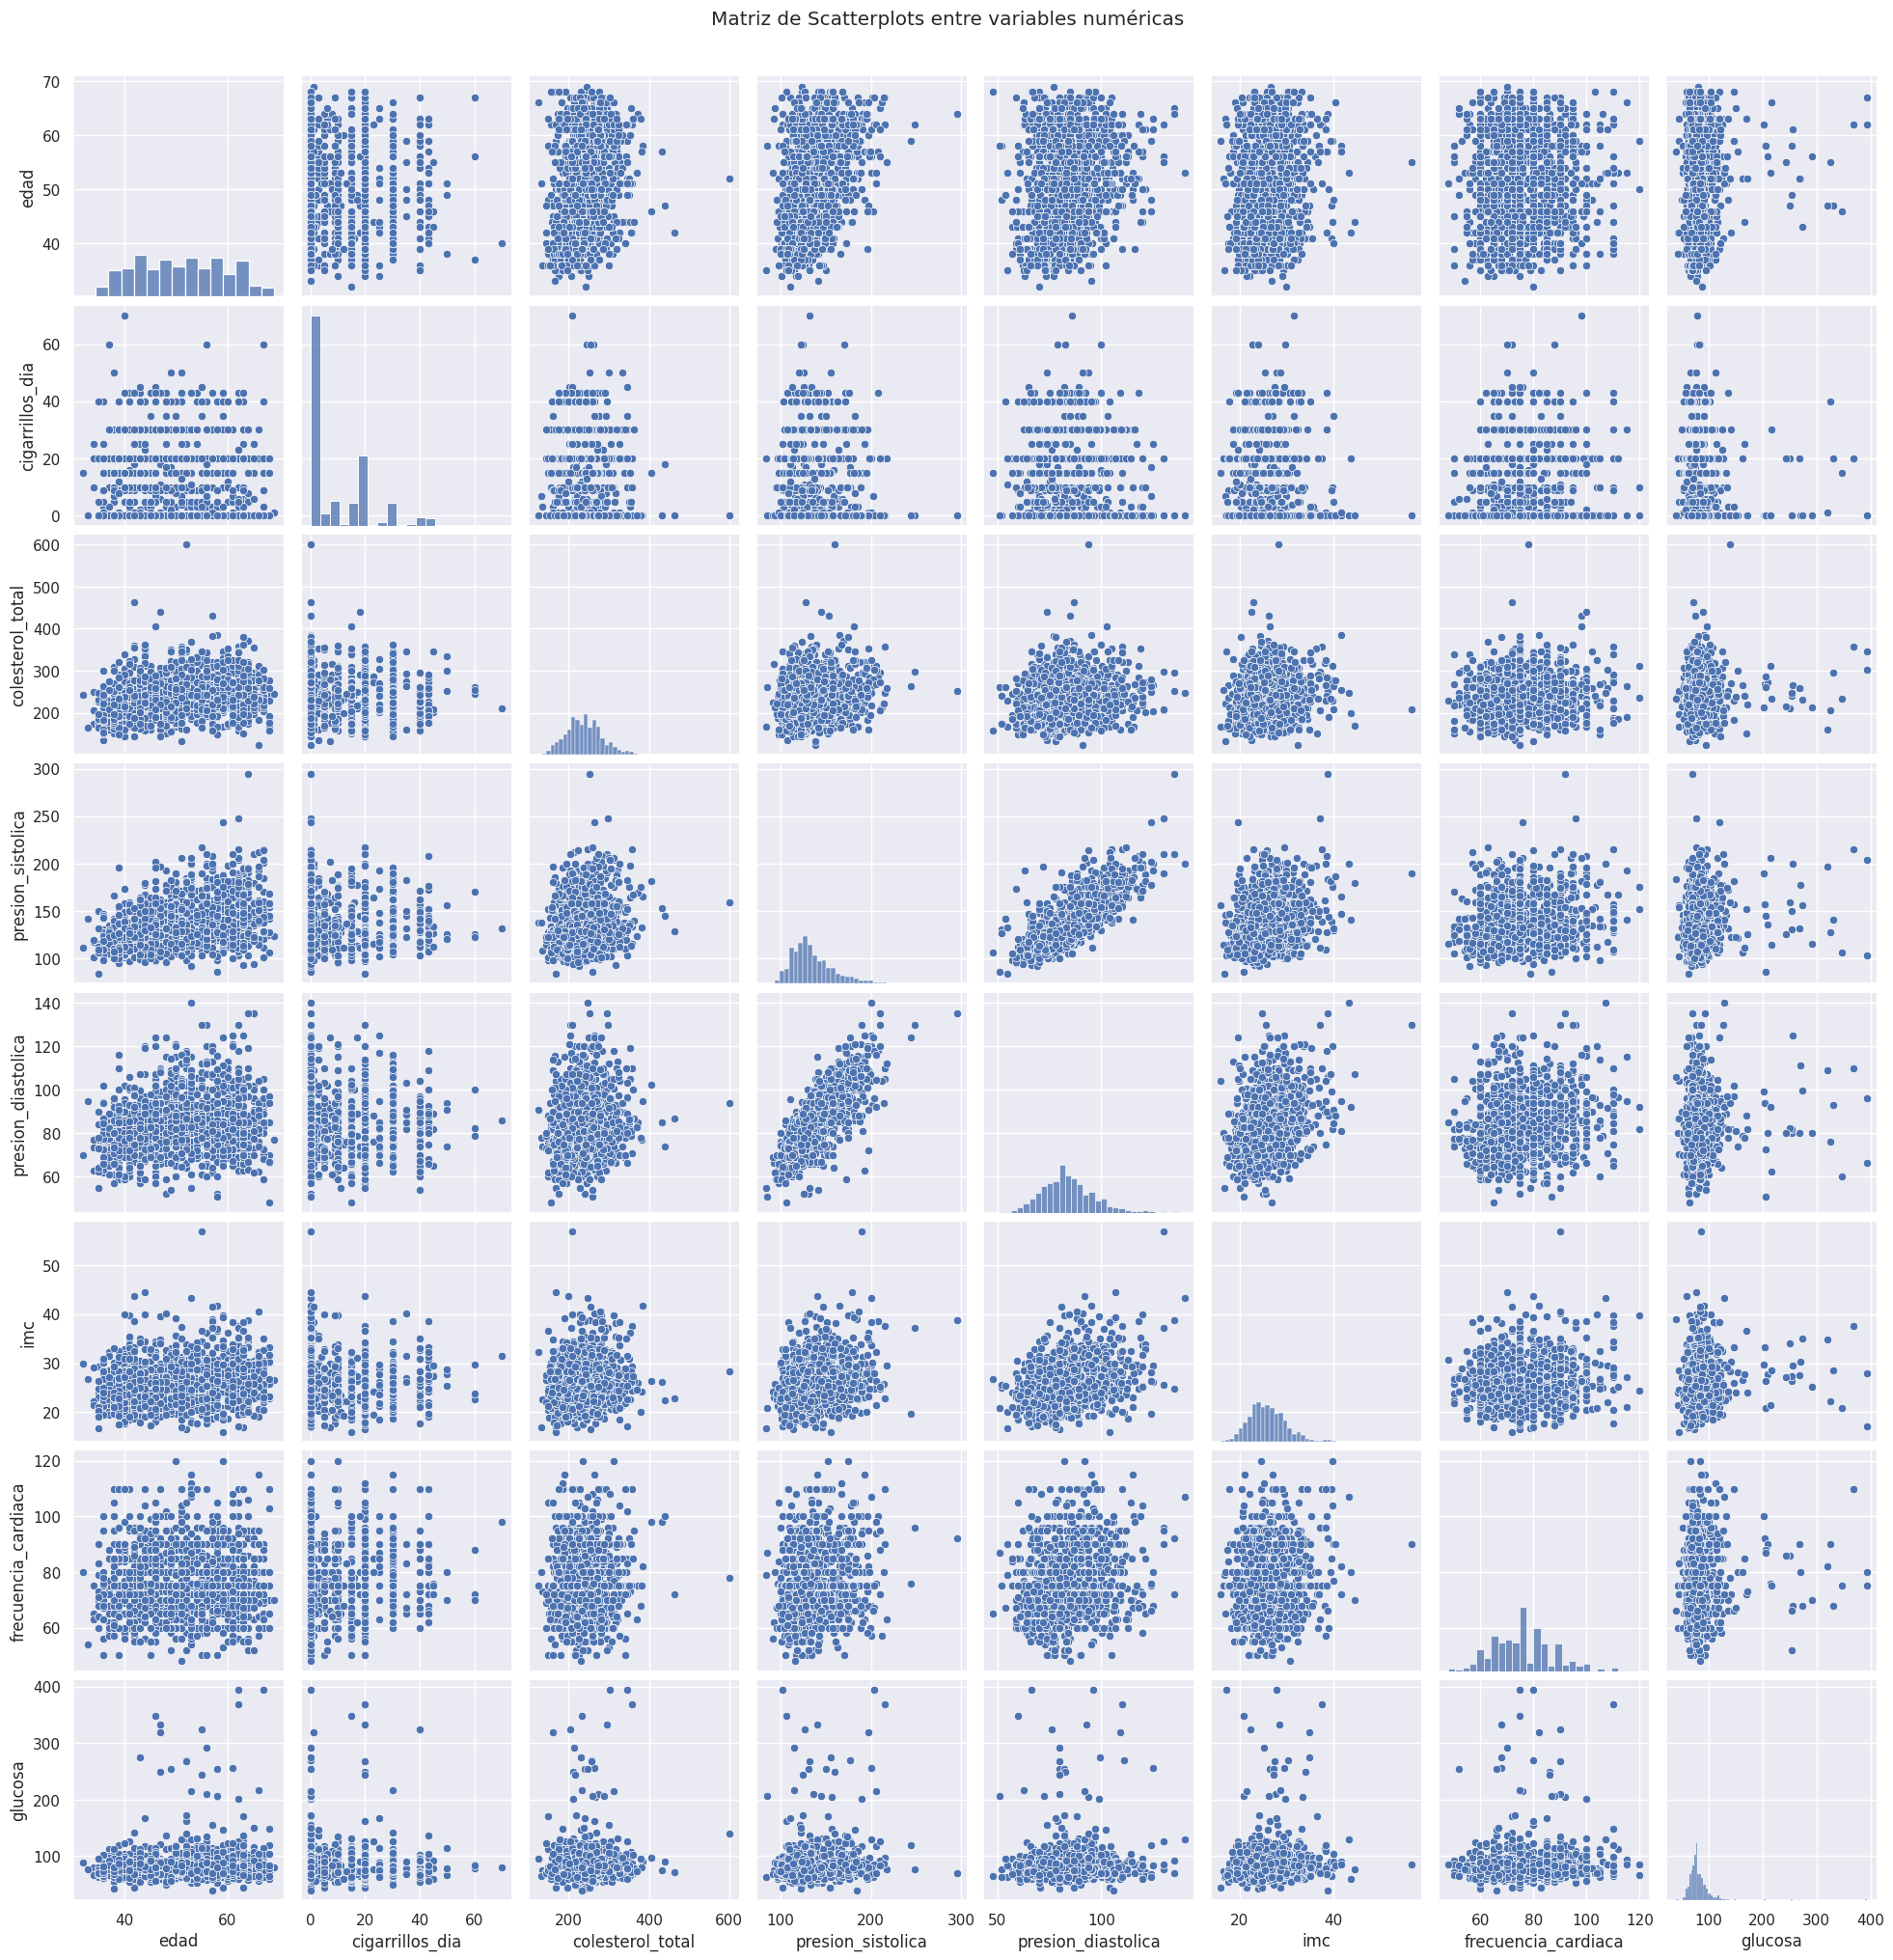

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

listaNumerico = [
    'edad', 'cigarrillos_dia', 'colesterol_total', 'presion_sistolica',
    'presion_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa'
]

sns.set()
sns.pairplot(df_limpio[listaNumerico])
plt.suptitle('Matriz de Scatterplots entre variables numéricas', y=1.02)
plt.show()


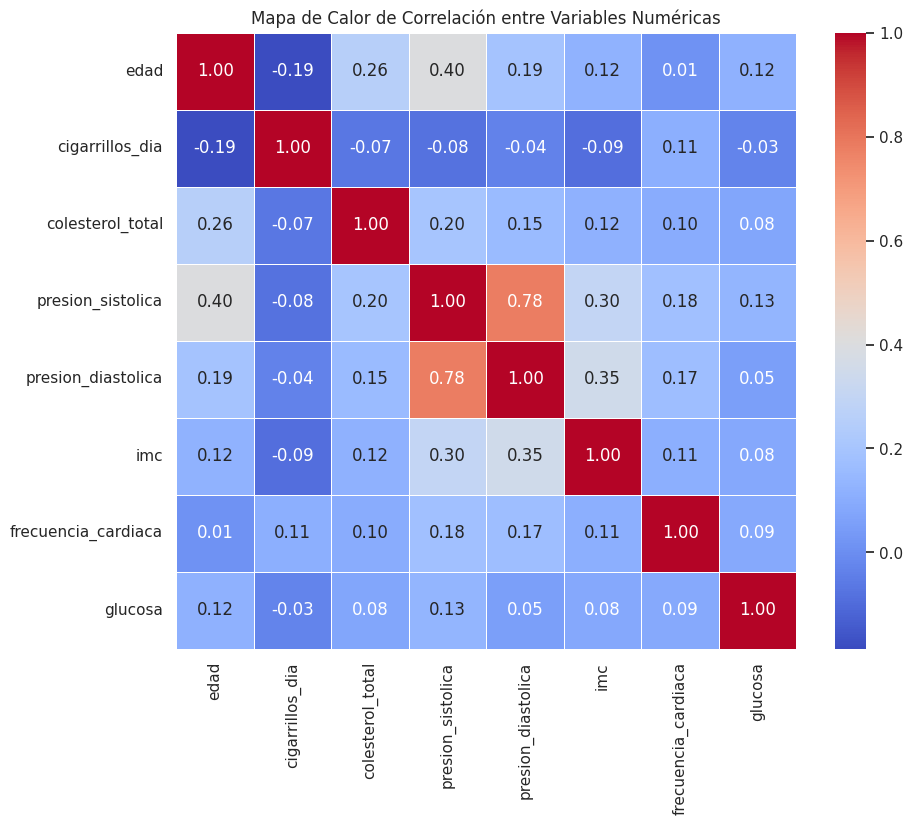

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

listaNumerico = [
    'edad', 'cigarrillos_dia', 'colesterol_total', 'presion_sistolica',
    'presion_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa'
]

correlacion = df_limpio[listaNumerico].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()


Graficos multidimensionales


Mostrando gráfico: edad vs cigarrillos_dia por clase riesgo_coronario_10_años


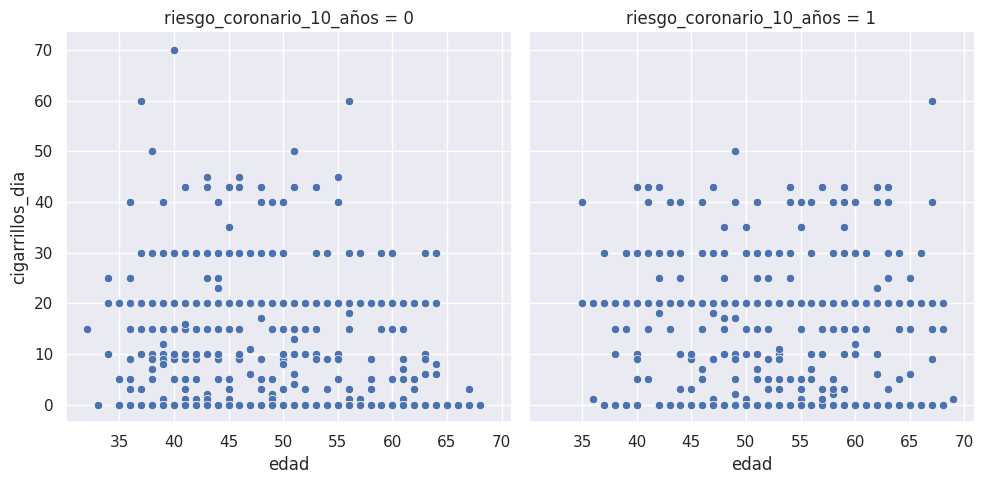


Mostrando gráfico: edad vs colesterol_total por clase riesgo_coronario_10_años


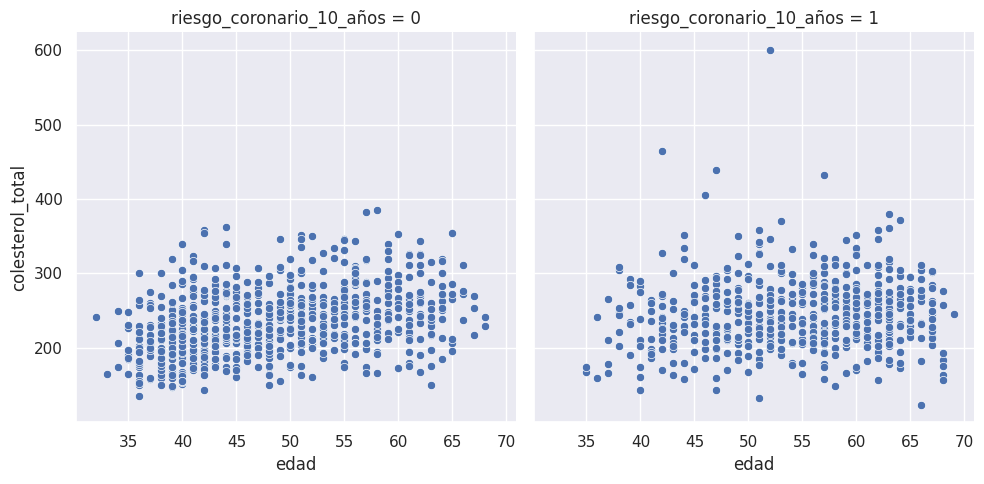


Mostrando gráfico: edad vs presion_sistolica por clase riesgo_coronario_10_años


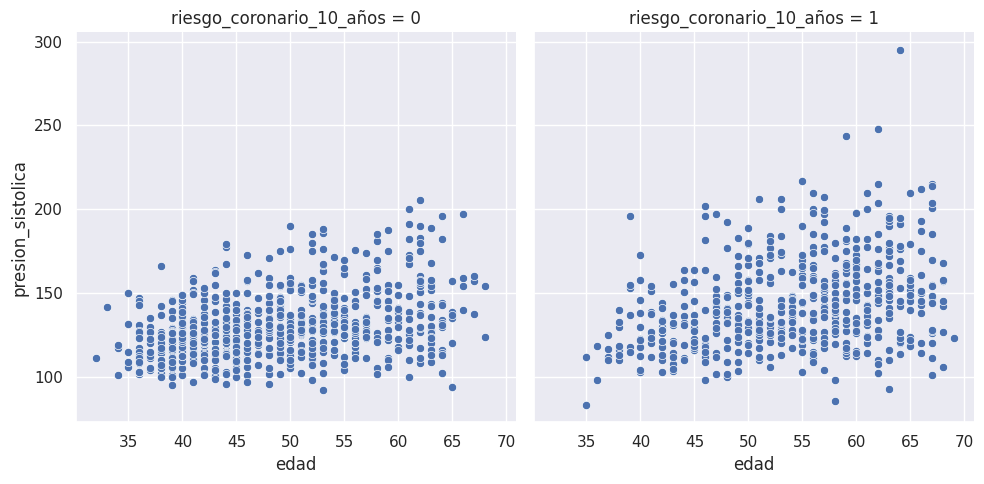


Mostrando gráfico: edad vs presion_diastolica por clase riesgo_coronario_10_años


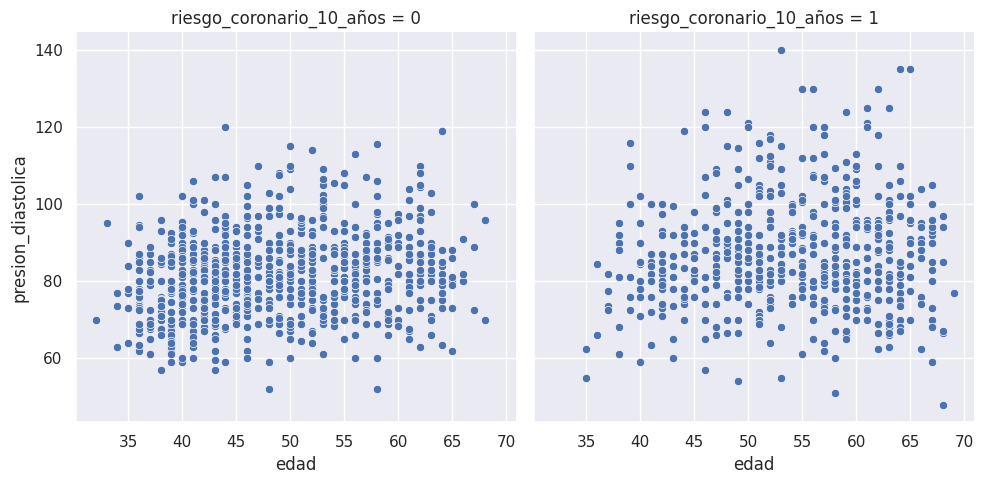


Mostrando gráfico: edad vs imc por clase riesgo_coronario_10_años


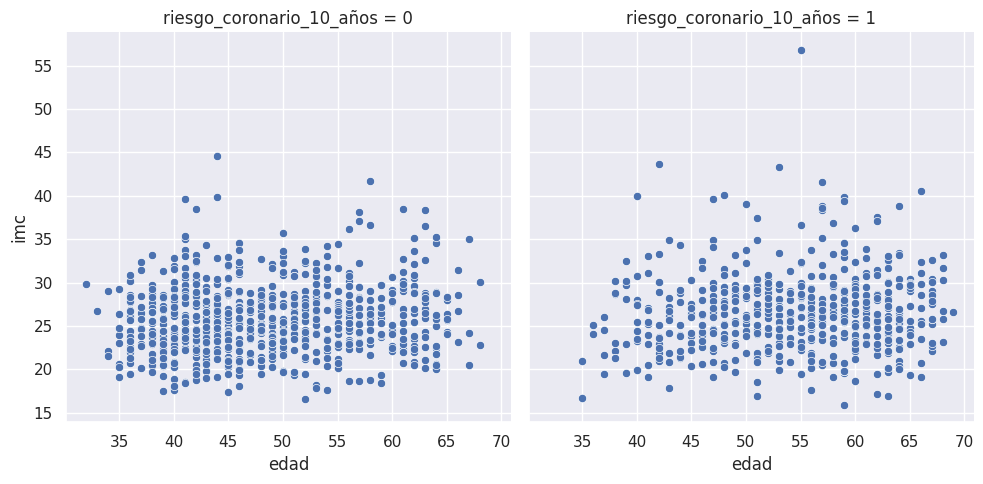


Mostrando gráfico: edad vs frecuencia_cardiaca por clase riesgo_coronario_10_años


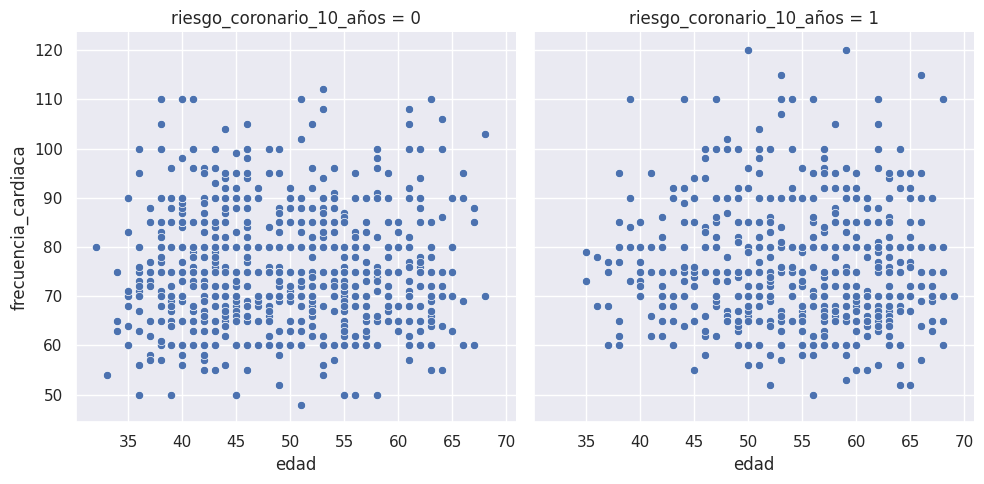


Mostrando gráfico: edad vs glucosa por clase riesgo_coronario_10_años


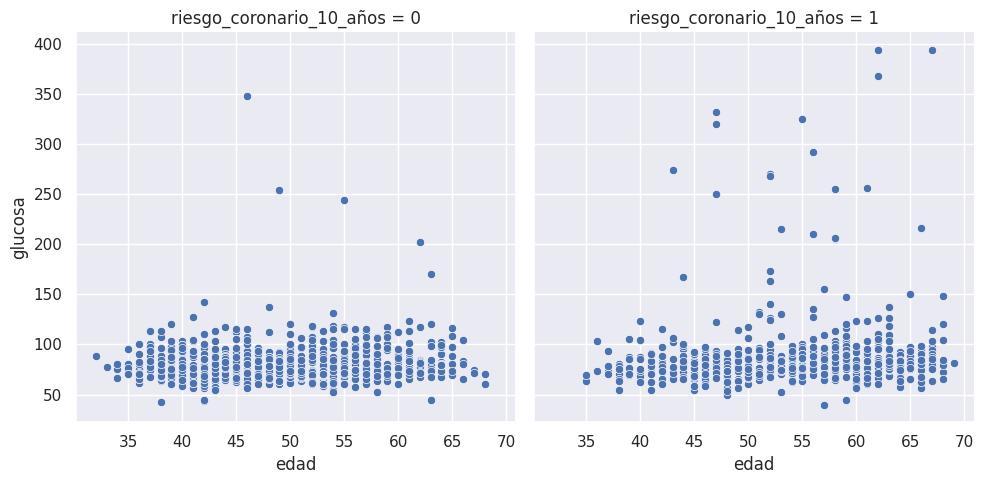


Mostrando gráfico: cigarrillos_dia vs edad por clase riesgo_coronario_10_años


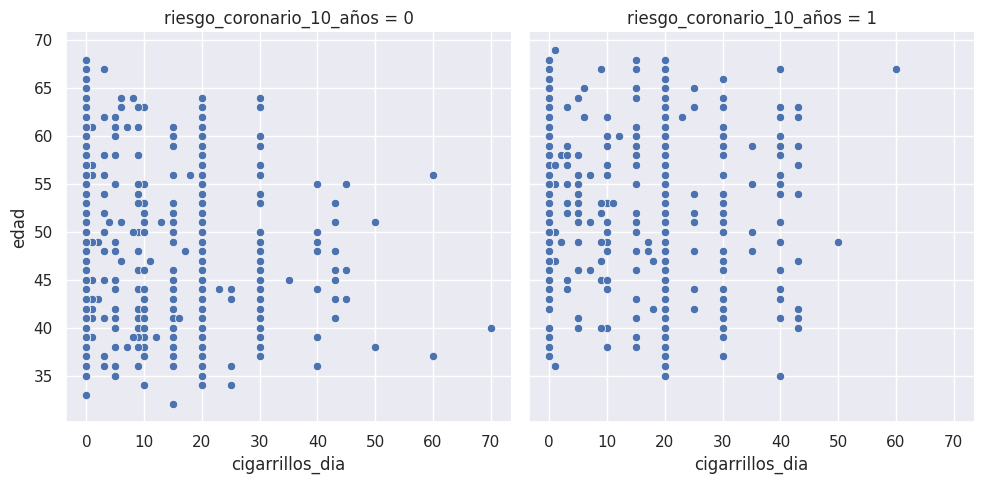


Mostrando gráfico: cigarrillos_dia vs colesterol_total por clase riesgo_coronario_10_años


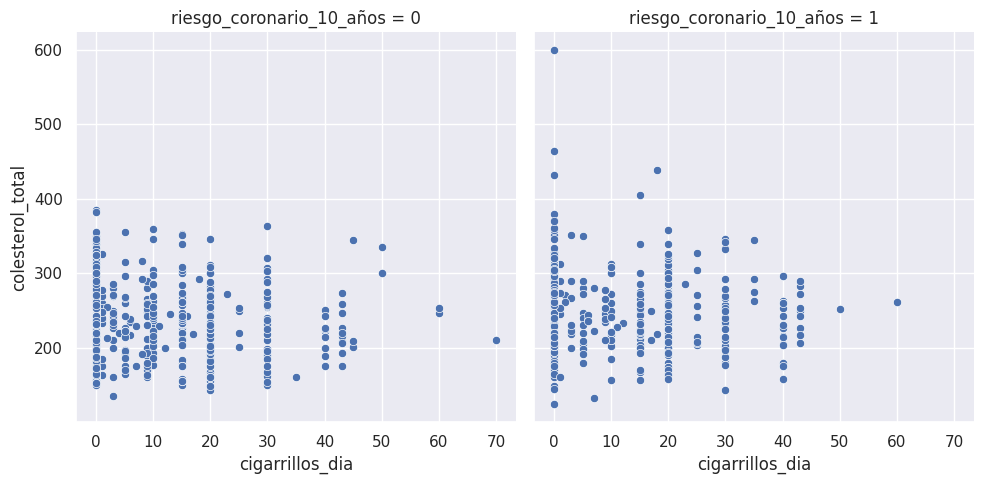


Mostrando gráfico: cigarrillos_dia vs presion_sistolica por clase riesgo_coronario_10_años


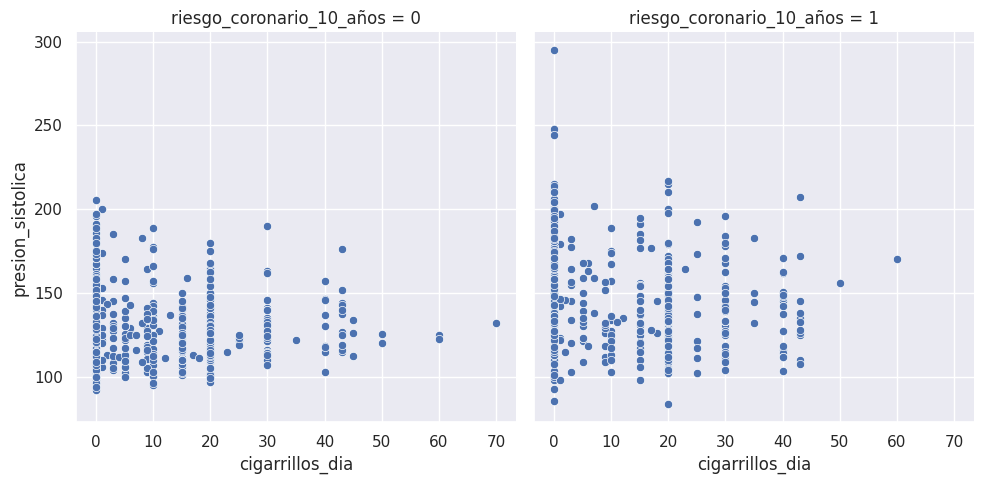


Mostrando gráfico: cigarrillos_dia vs presion_diastolica por clase riesgo_coronario_10_años


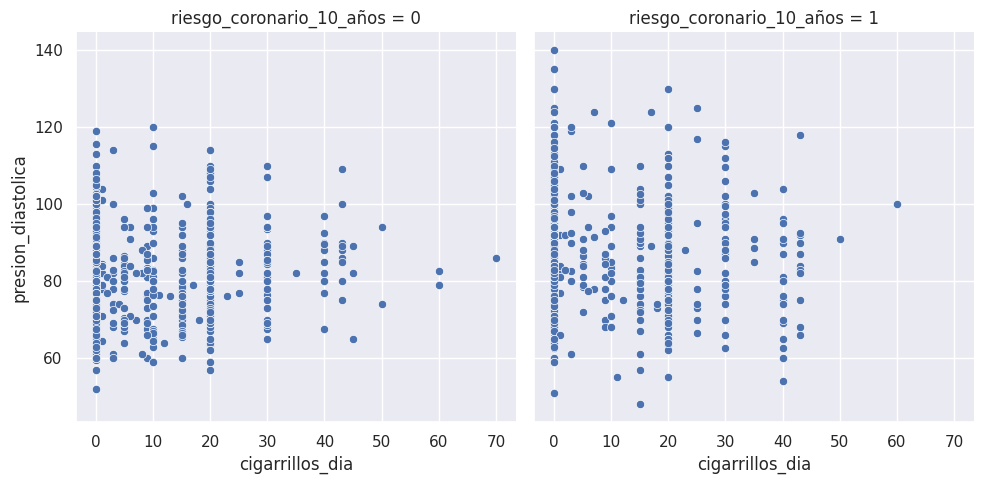


Mostrando gráfico: cigarrillos_dia vs imc por clase riesgo_coronario_10_años


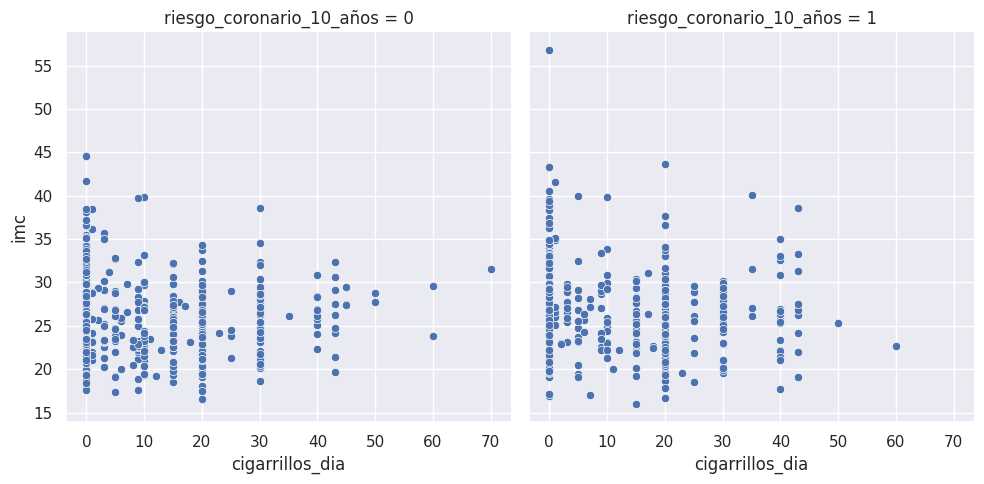


Mostrando gráfico: cigarrillos_dia vs frecuencia_cardiaca por clase riesgo_coronario_10_años


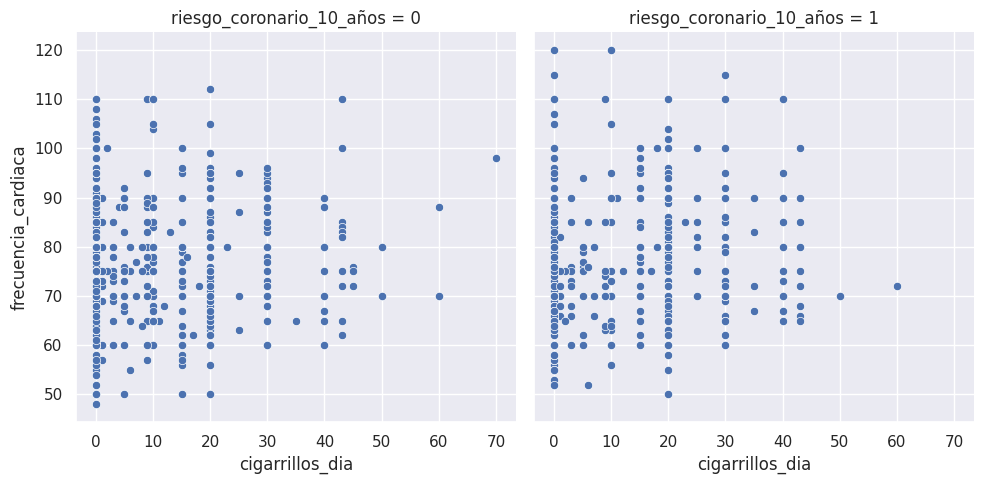


Mostrando gráfico: cigarrillos_dia vs glucosa por clase riesgo_coronario_10_años


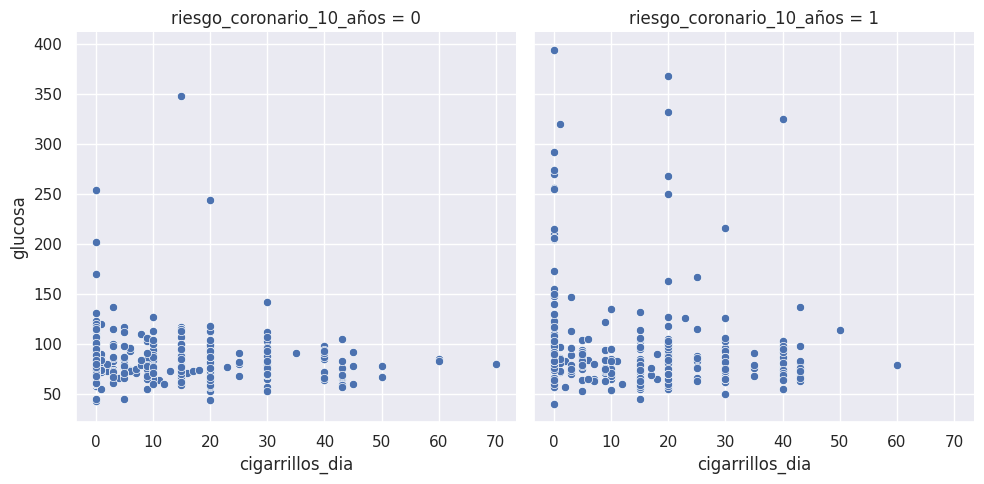


Mostrando gráfico: colesterol_total vs edad por clase riesgo_coronario_10_años


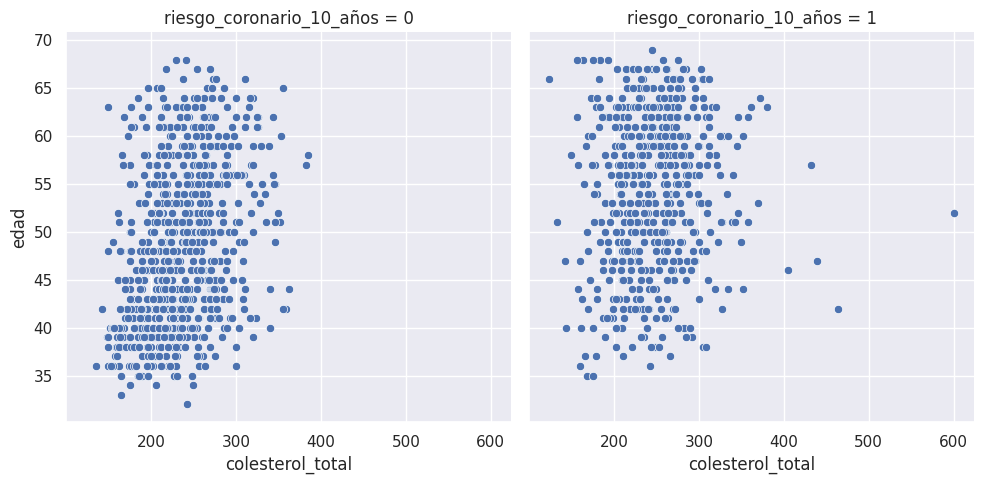


Mostrando gráfico: colesterol_total vs cigarrillos_dia por clase riesgo_coronario_10_años


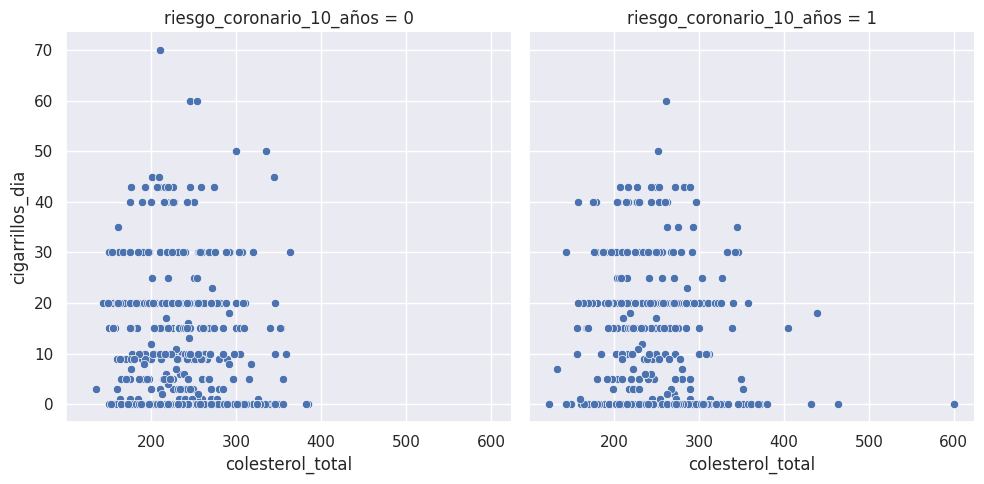


Mostrando gráfico: colesterol_total vs presion_sistolica por clase riesgo_coronario_10_años


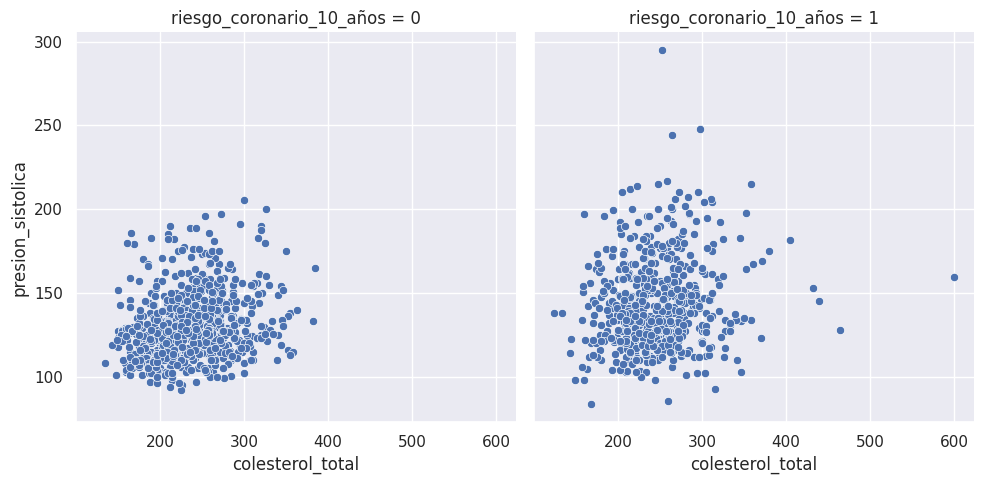


Mostrando gráfico: colesterol_total vs presion_diastolica por clase riesgo_coronario_10_años


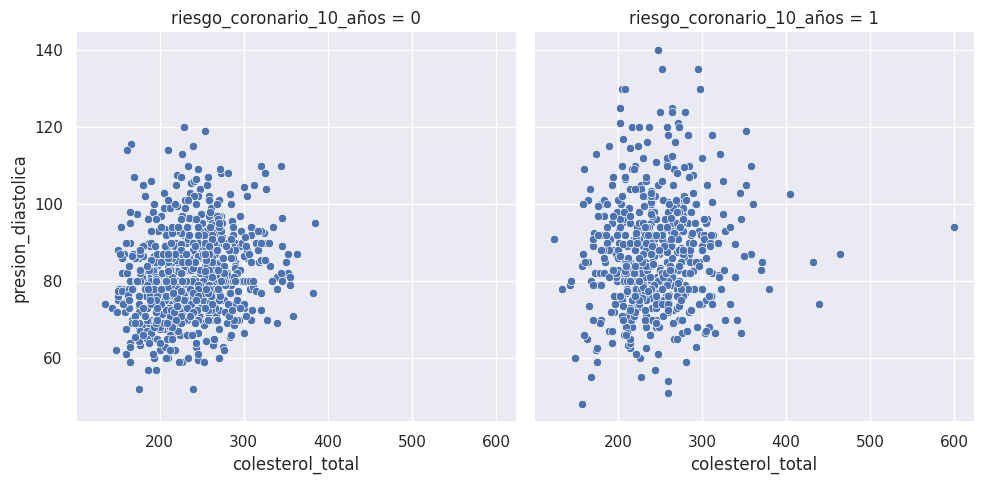


Mostrando gráfico: colesterol_total vs imc por clase riesgo_coronario_10_años


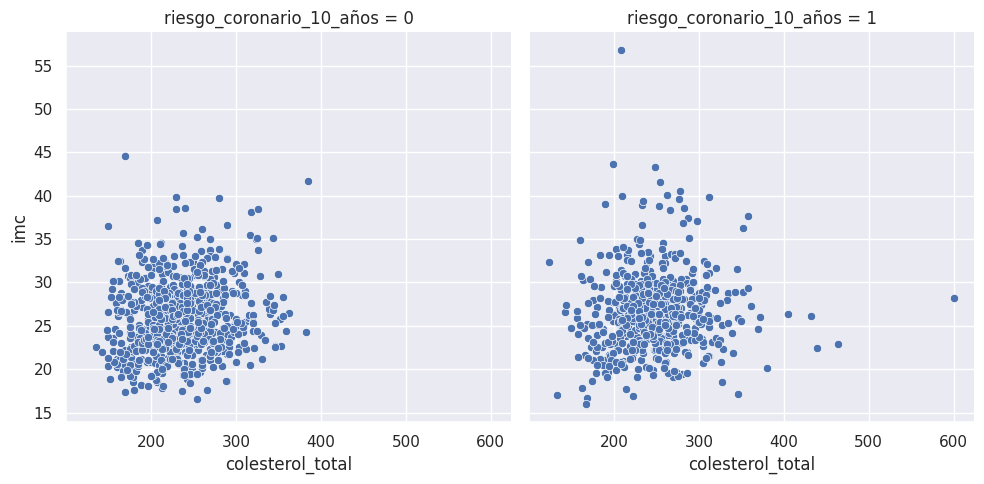


Mostrando gráfico: colesterol_total vs frecuencia_cardiaca por clase riesgo_coronario_10_años


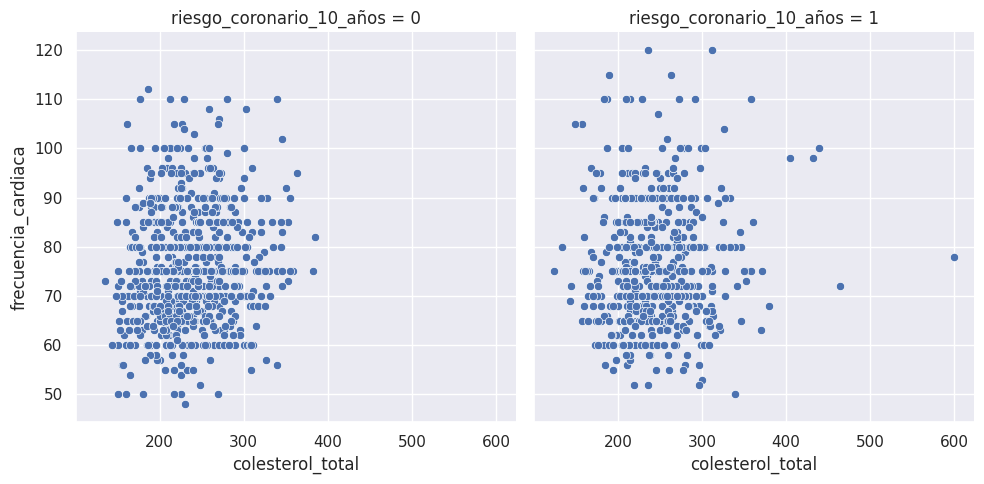


Mostrando gráfico: colesterol_total vs glucosa por clase riesgo_coronario_10_años


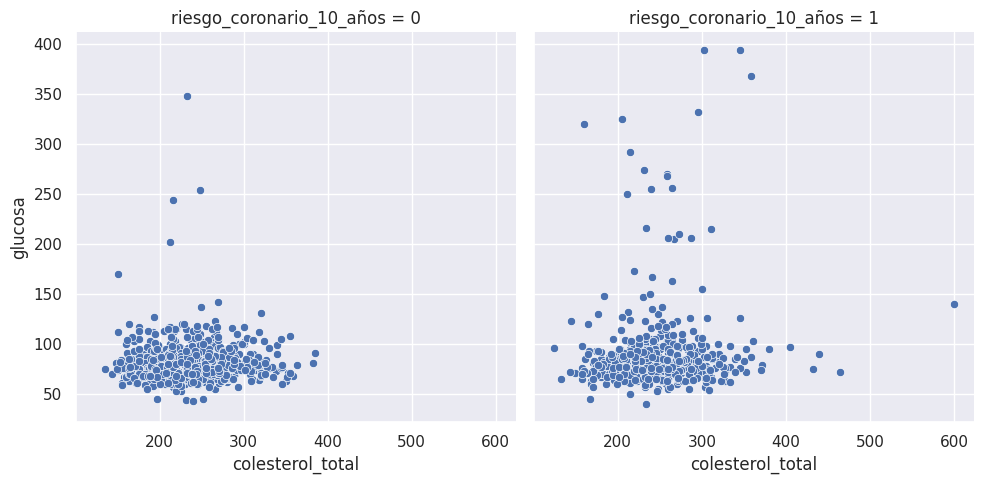


Mostrando gráfico: presion_sistolica vs edad por clase riesgo_coronario_10_años


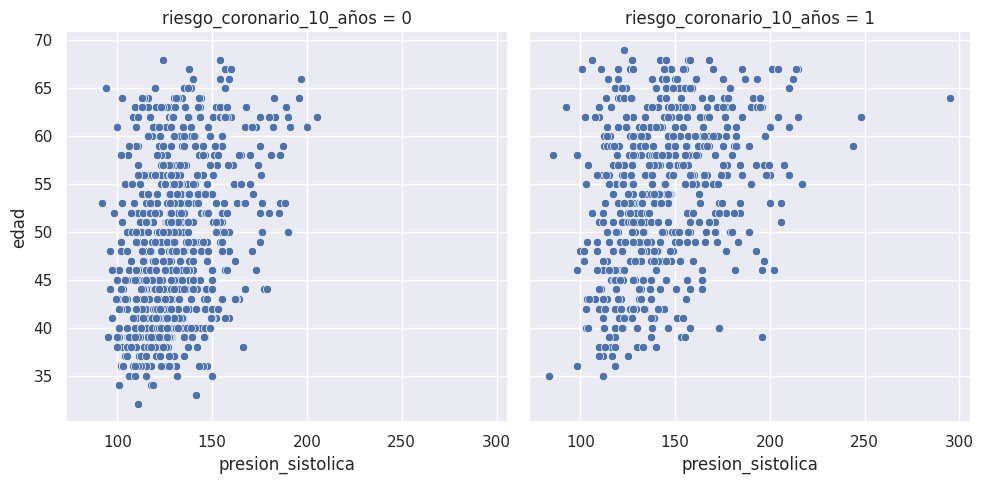


Mostrando gráfico: presion_sistolica vs cigarrillos_dia por clase riesgo_coronario_10_años


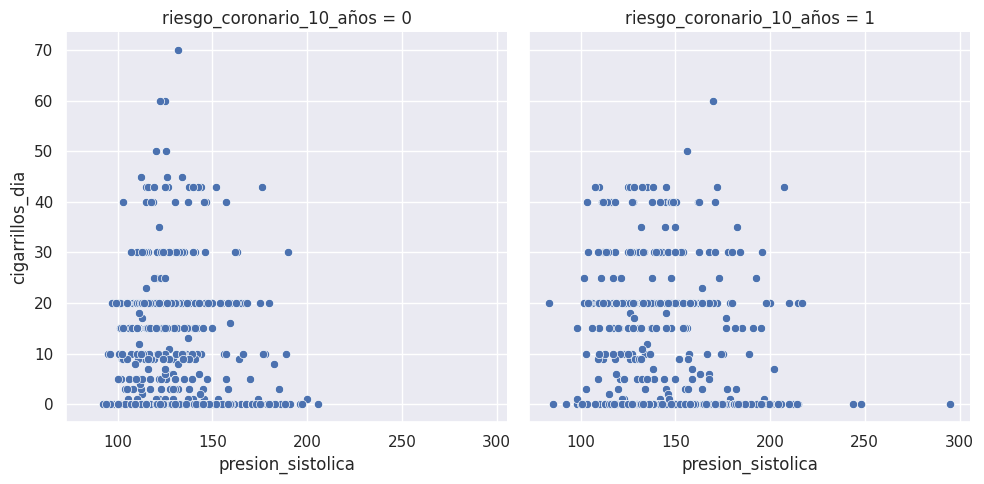


Mostrando gráfico: presion_sistolica vs colesterol_total por clase riesgo_coronario_10_años


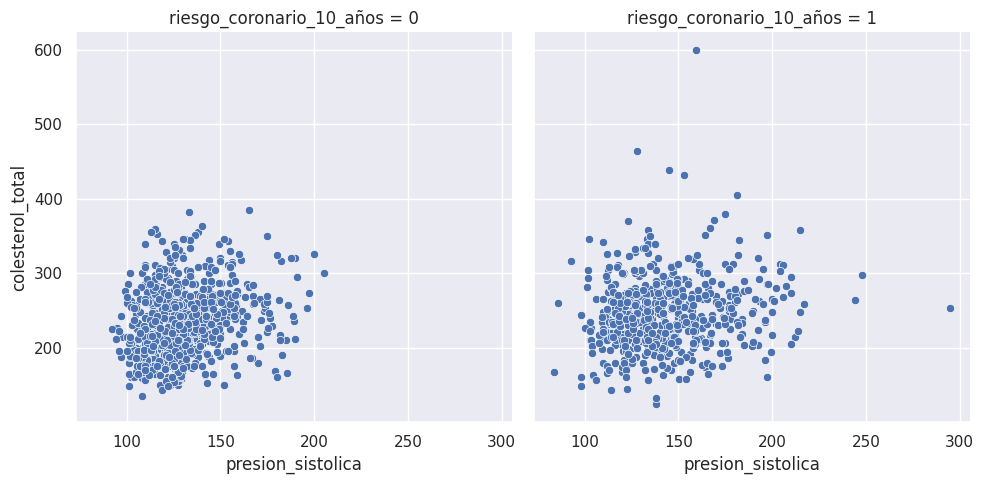


Mostrando gráfico: presion_sistolica vs presion_diastolica por clase riesgo_coronario_10_años


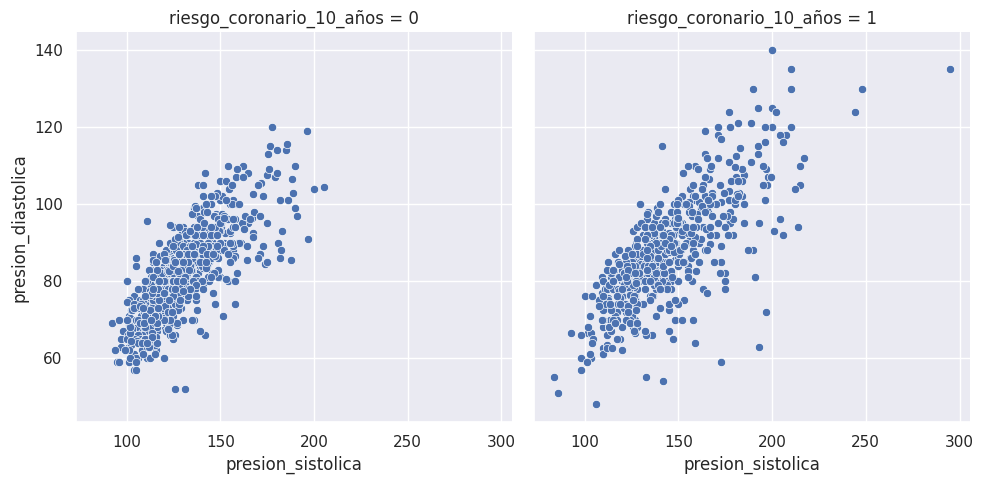


Mostrando gráfico: presion_sistolica vs imc por clase riesgo_coronario_10_años


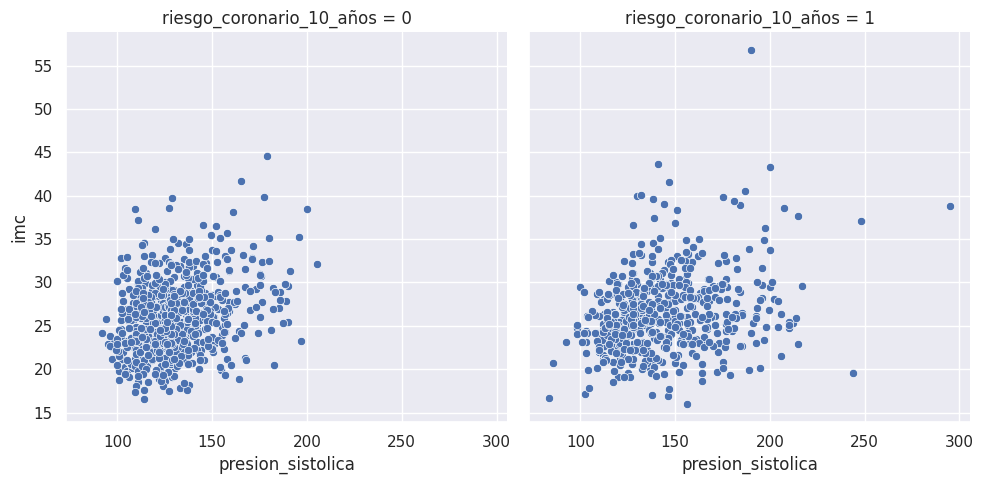


Mostrando gráfico: presion_sistolica vs frecuencia_cardiaca por clase riesgo_coronario_10_años


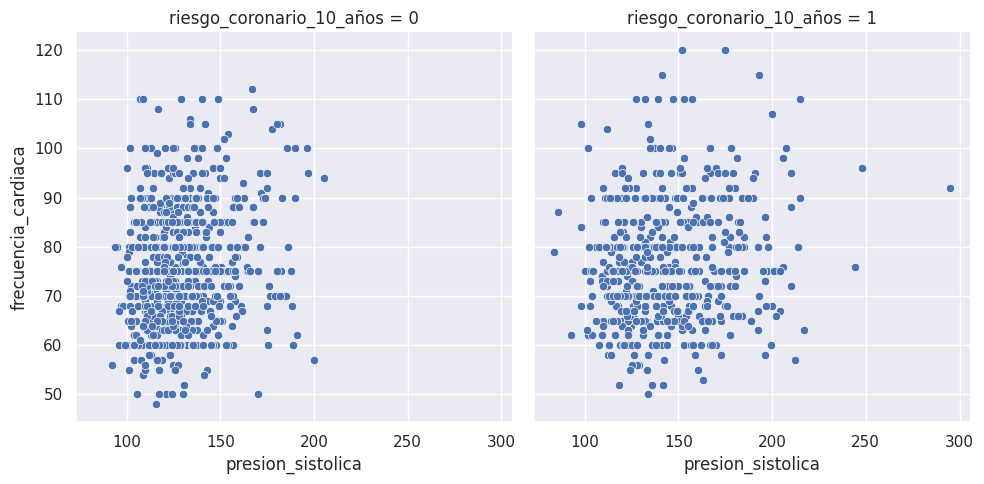


Mostrando gráfico: presion_sistolica vs glucosa por clase riesgo_coronario_10_años


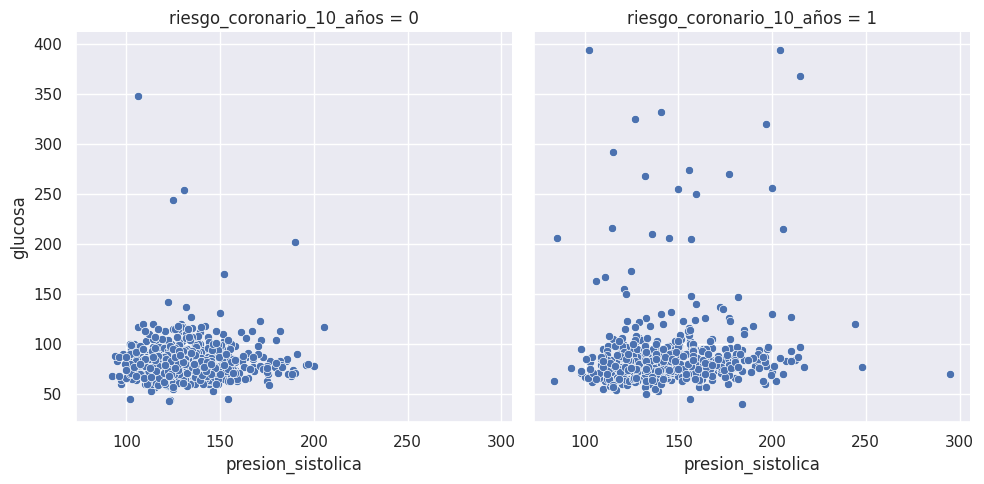


Mostrando gráfico: presion_diastolica vs edad por clase riesgo_coronario_10_años


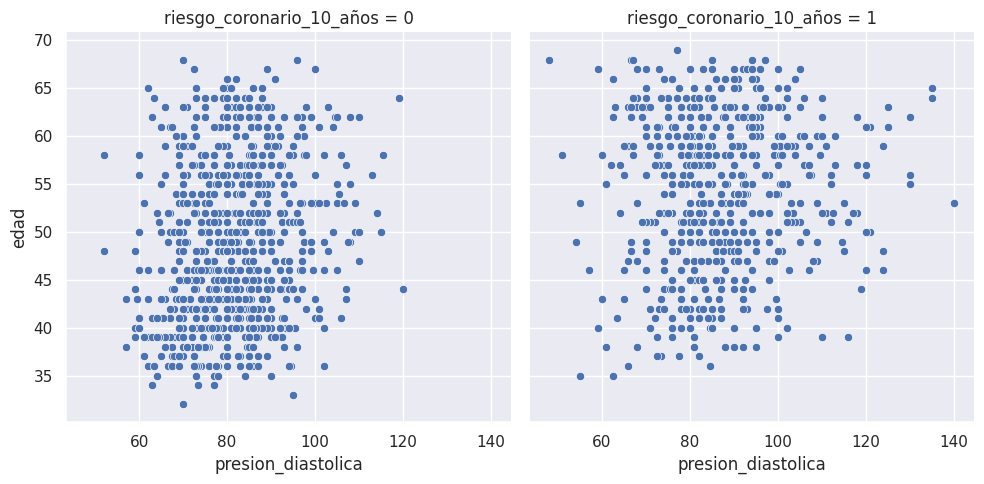


Mostrando gráfico: presion_diastolica vs cigarrillos_dia por clase riesgo_coronario_10_años


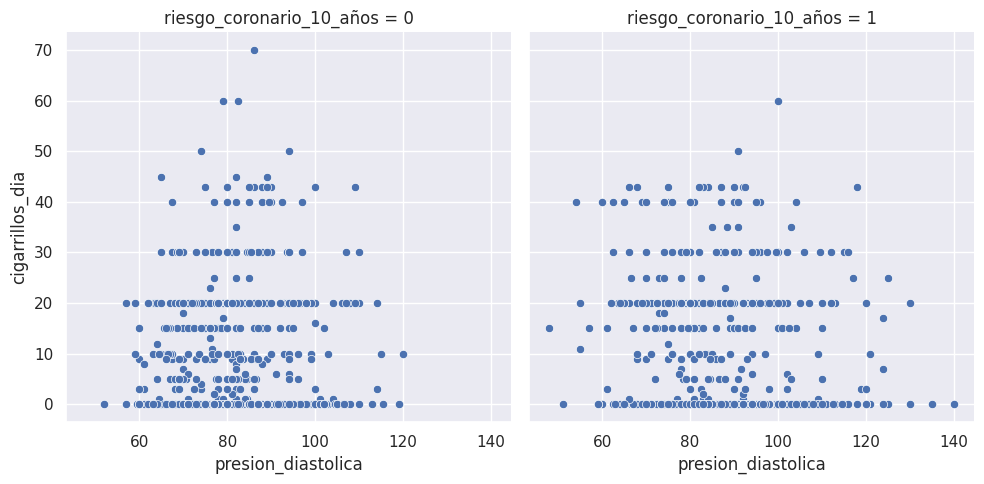


Mostrando gráfico: presion_diastolica vs colesterol_total por clase riesgo_coronario_10_años


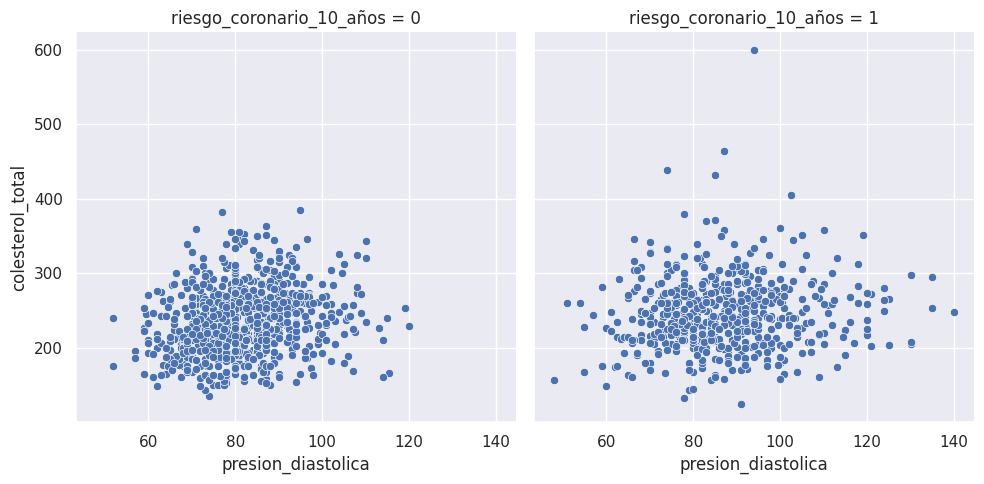


Mostrando gráfico: presion_diastolica vs presion_sistolica por clase riesgo_coronario_10_años


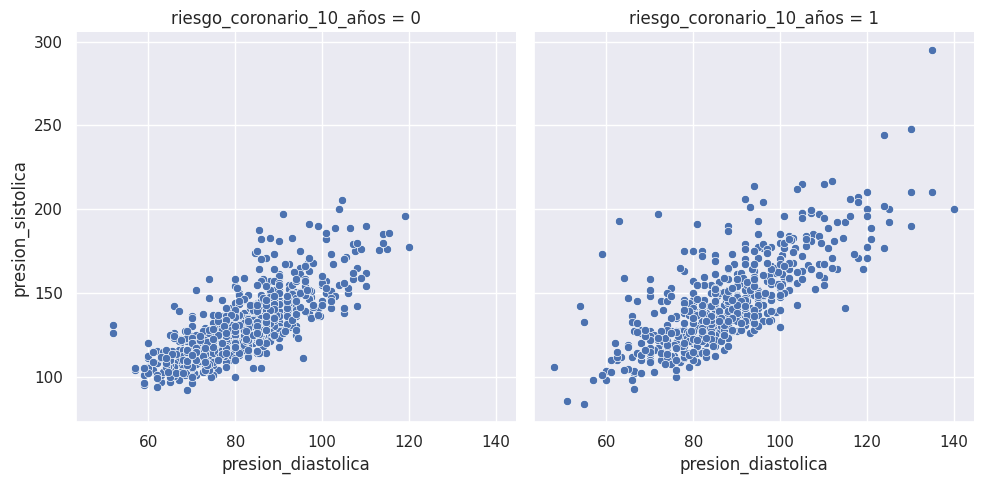


Mostrando gráfico: presion_diastolica vs imc por clase riesgo_coronario_10_años


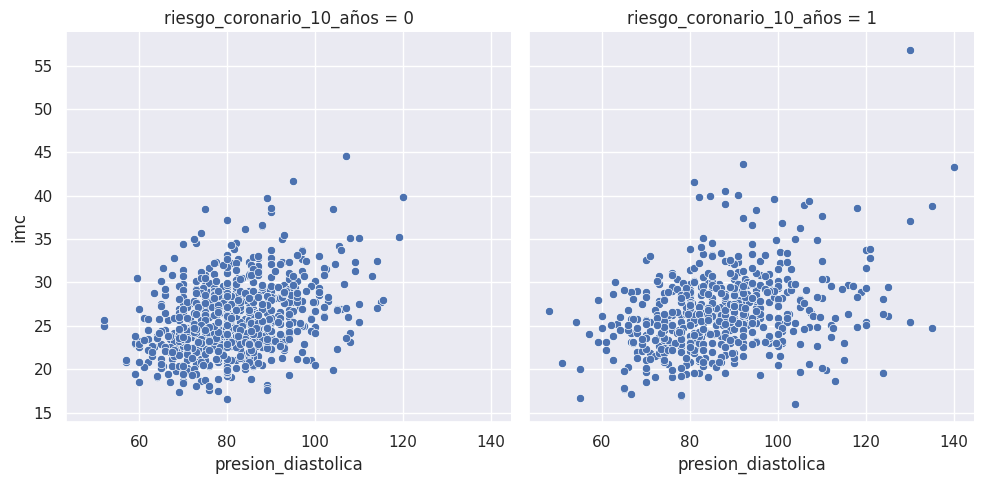


Mostrando gráfico: presion_diastolica vs frecuencia_cardiaca por clase riesgo_coronario_10_años


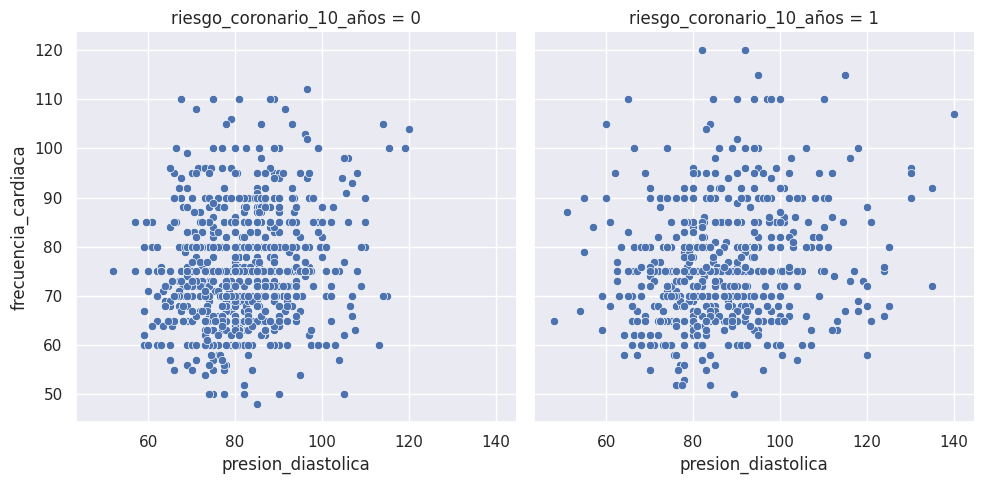


Mostrando gráfico: presion_diastolica vs glucosa por clase riesgo_coronario_10_años


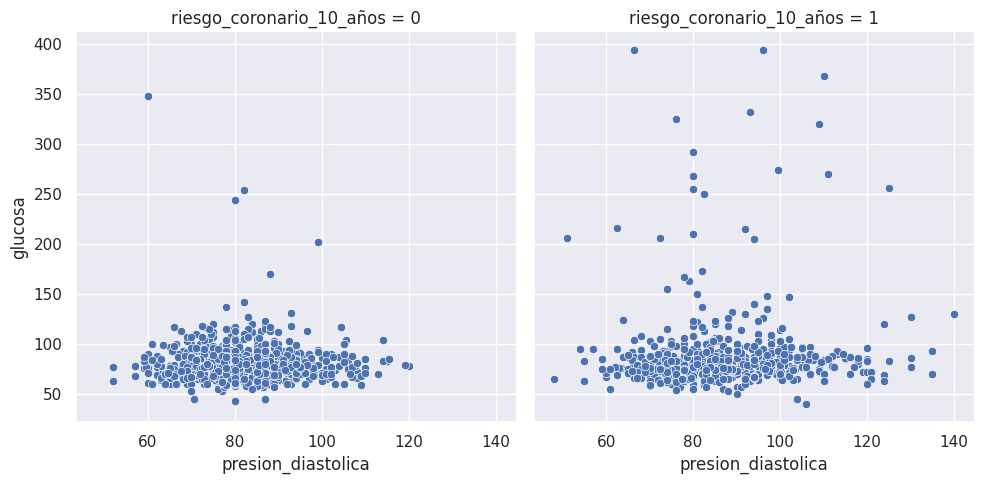


Mostrando gráfico: imc vs edad por clase riesgo_coronario_10_años


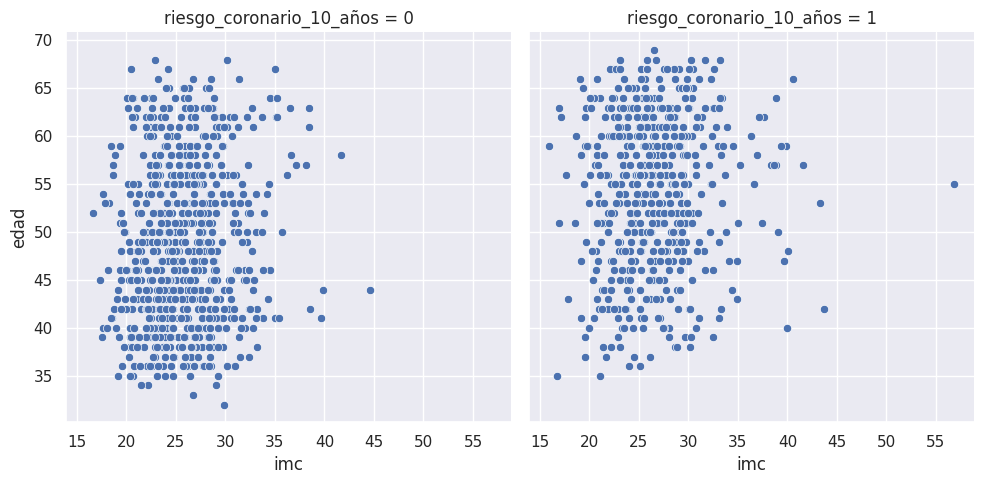


Mostrando gráfico: imc vs cigarrillos_dia por clase riesgo_coronario_10_años


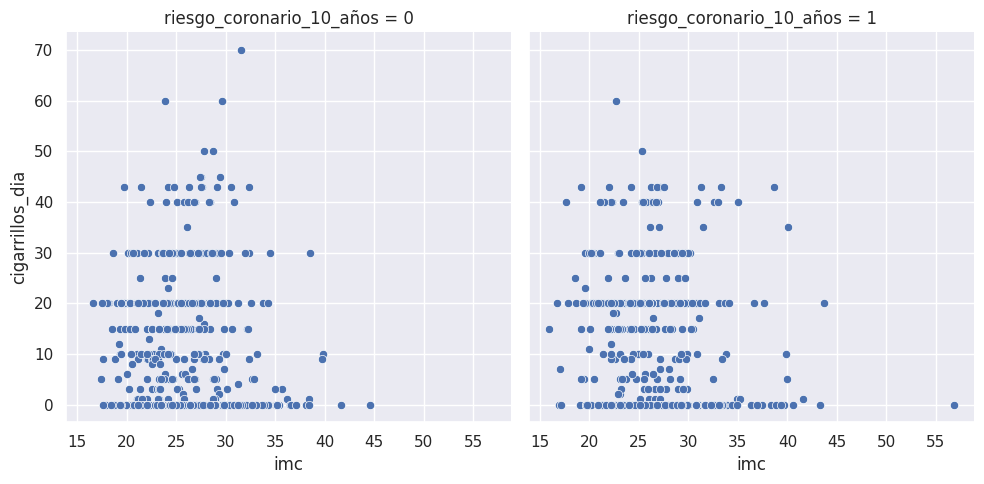


Mostrando gráfico: imc vs colesterol_total por clase riesgo_coronario_10_años


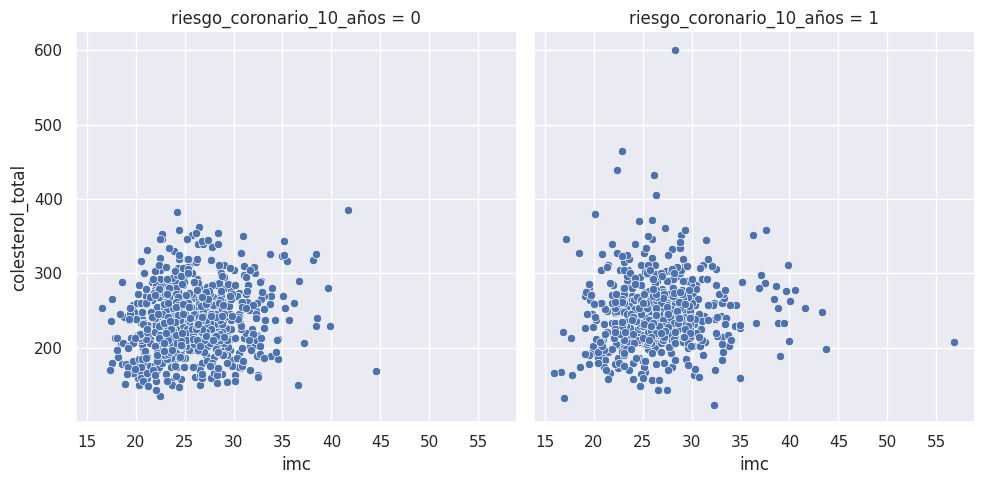


Mostrando gráfico: imc vs presion_sistolica por clase riesgo_coronario_10_años


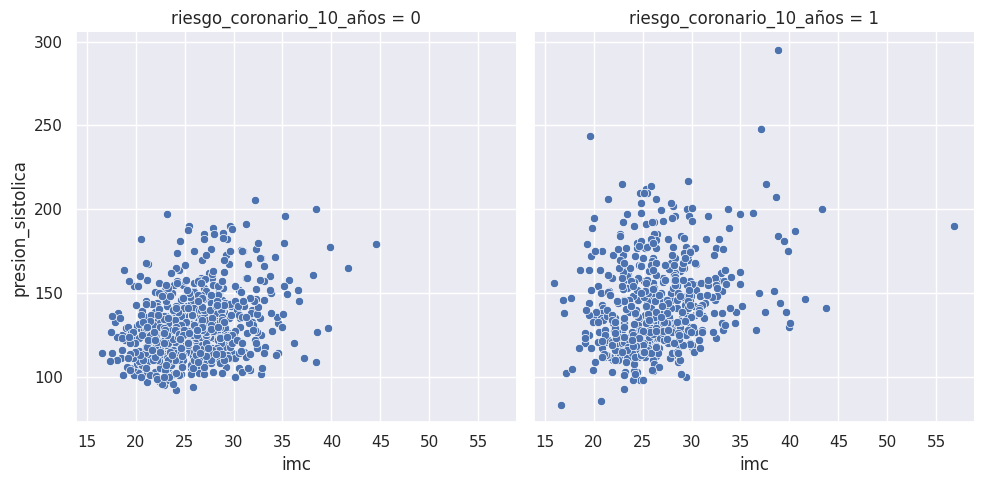


Mostrando gráfico: imc vs presion_diastolica por clase riesgo_coronario_10_años


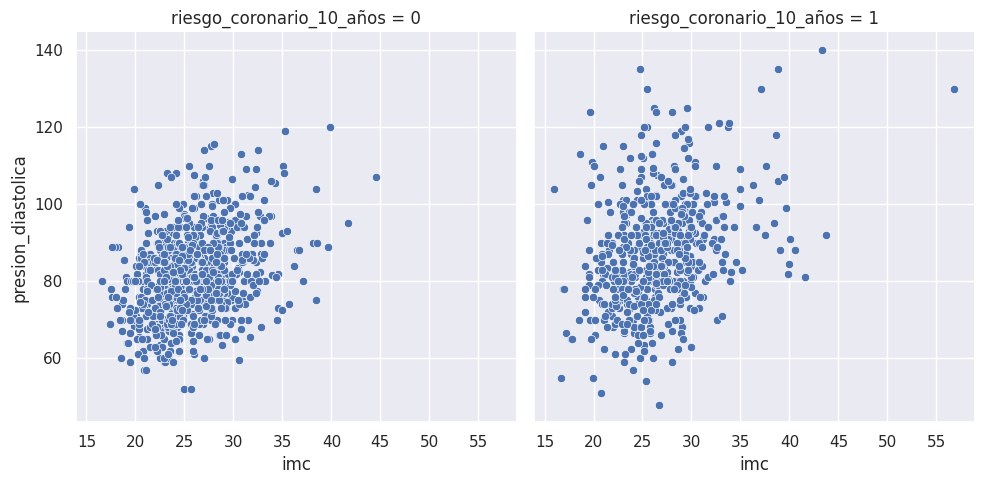


Mostrando gráfico: imc vs frecuencia_cardiaca por clase riesgo_coronario_10_años


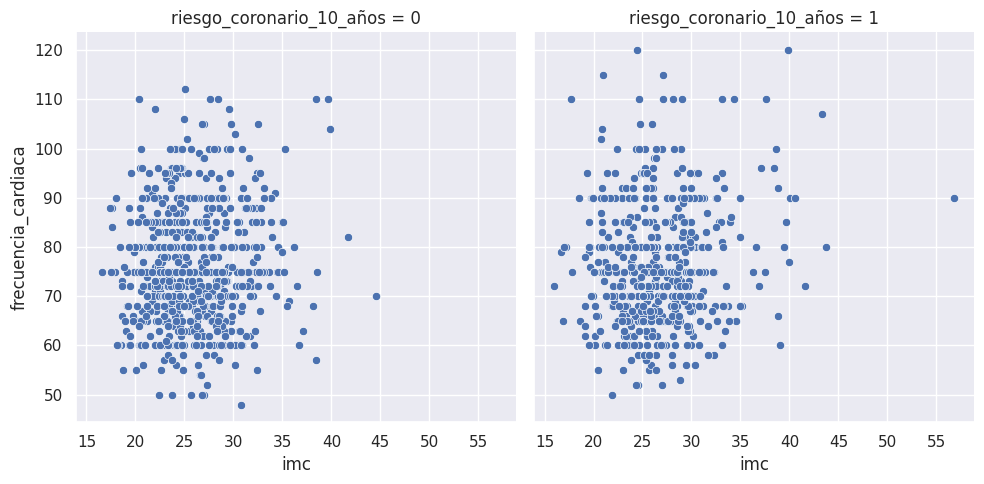


Mostrando gráfico: imc vs glucosa por clase riesgo_coronario_10_años


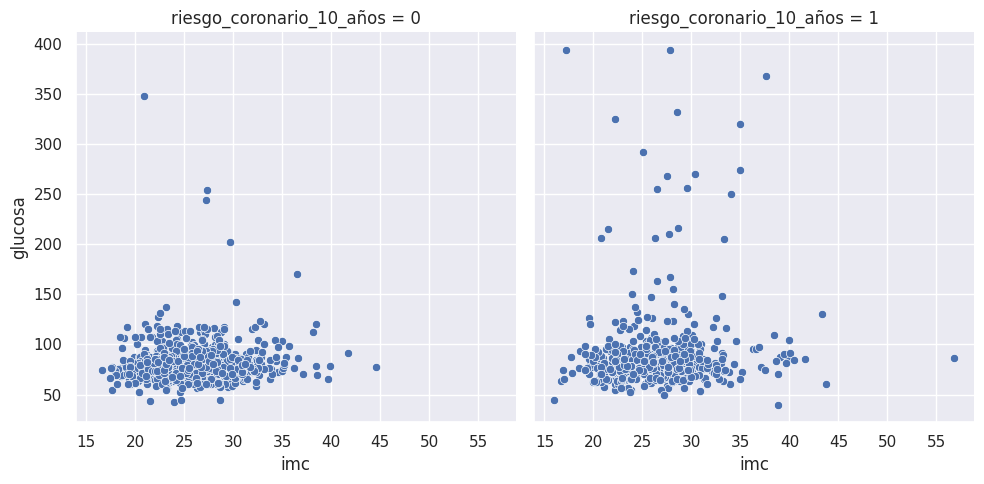


Mostrando gráfico: frecuencia_cardiaca vs edad por clase riesgo_coronario_10_años


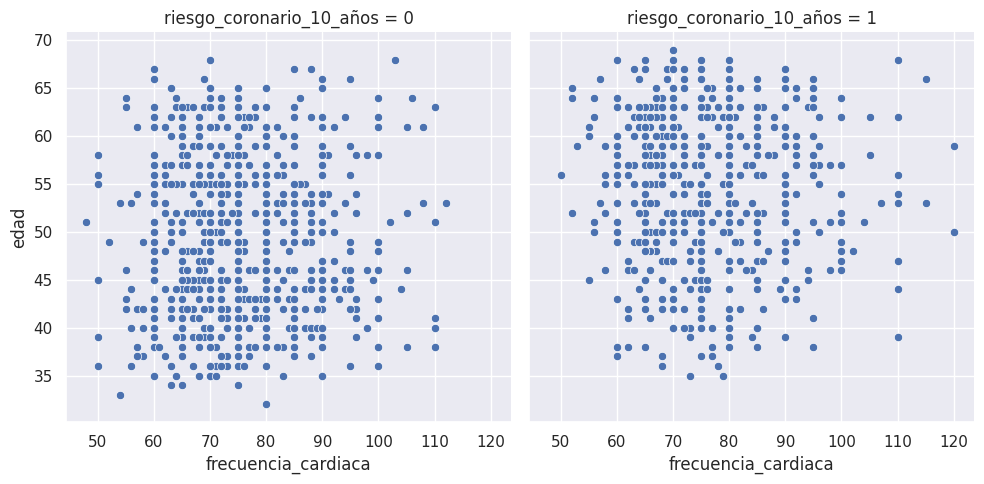


Mostrando gráfico: frecuencia_cardiaca vs cigarrillos_dia por clase riesgo_coronario_10_años


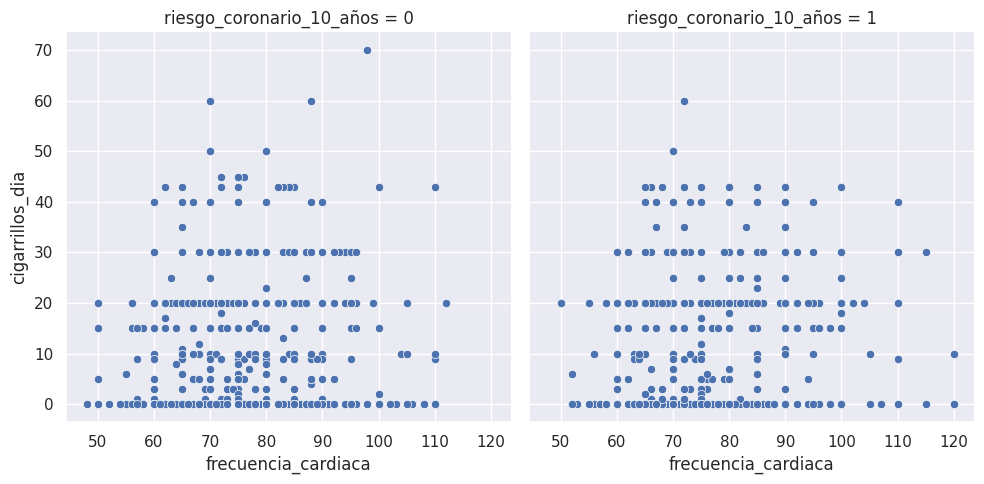


Mostrando gráfico: frecuencia_cardiaca vs colesterol_total por clase riesgo_coronario_10_años


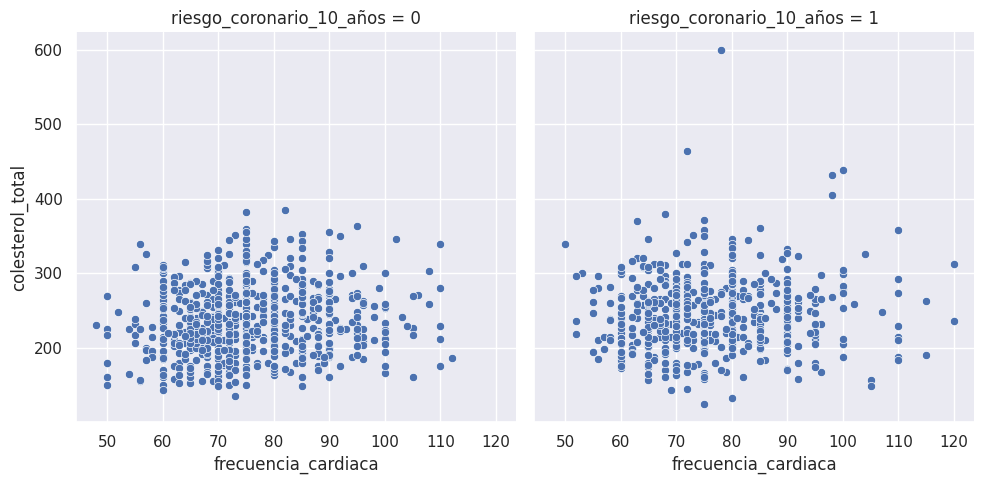


Mostrando gráfico: frecuencia_cardiaca vs presion_sistolica por clase riesgo_coronario_10_años


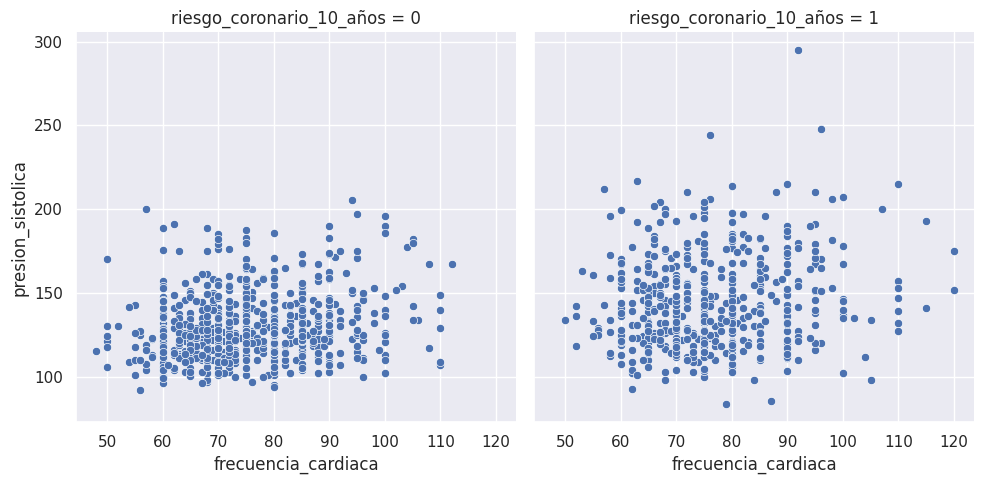


Mostrando gráfico: frecuencia_cardiaca vs presion_diastolica por clase riesgo_coronario_10_años


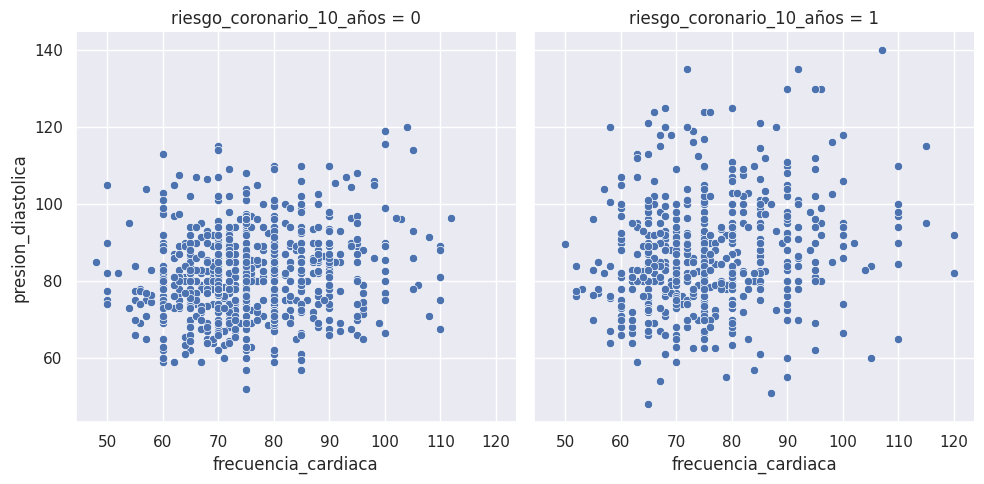


Mostrando gráfico: frecuencia_cardiaca vs imc por clase riesgo_coronario_10_años


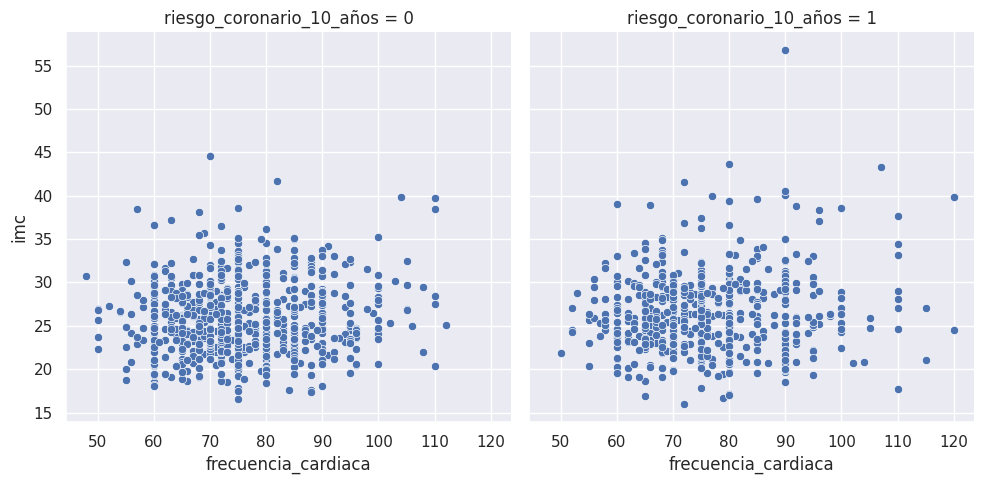


Mostrando gráfico: frecuencia_cardiaca vs glucosa por clase riesgo_coronario_10_años


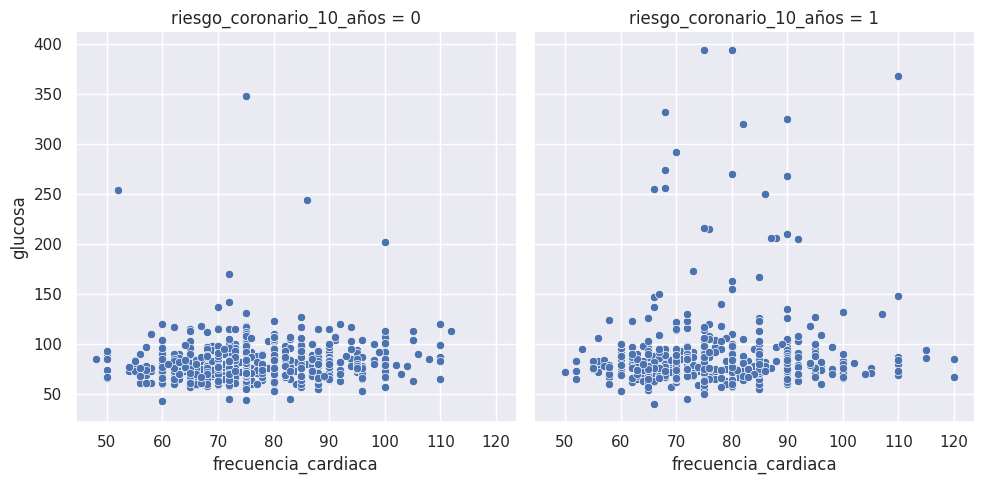


Mostrando gráfico: glucosa vs edad por clase riesgo_coronario_10_años


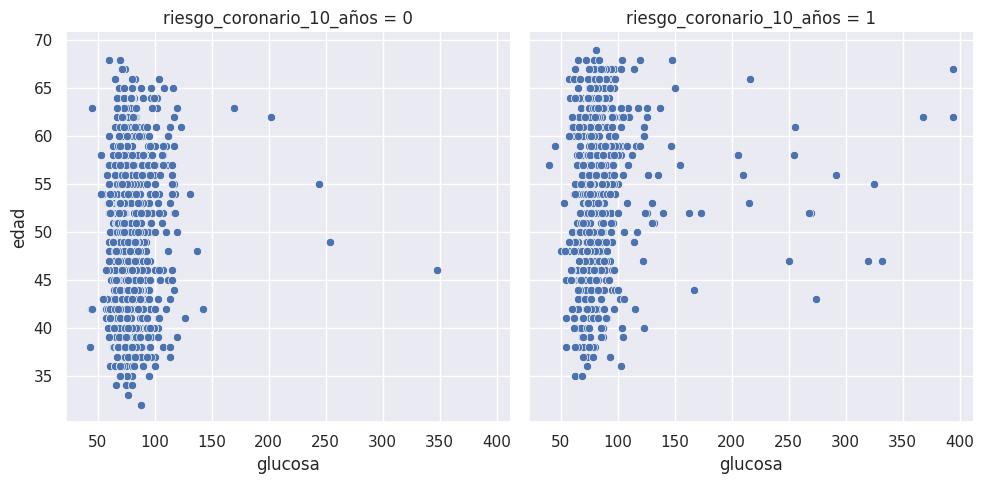


Mostrando gráfico: glucosa vs cigarrillos_dia por clase riesgo_coronario_10_años


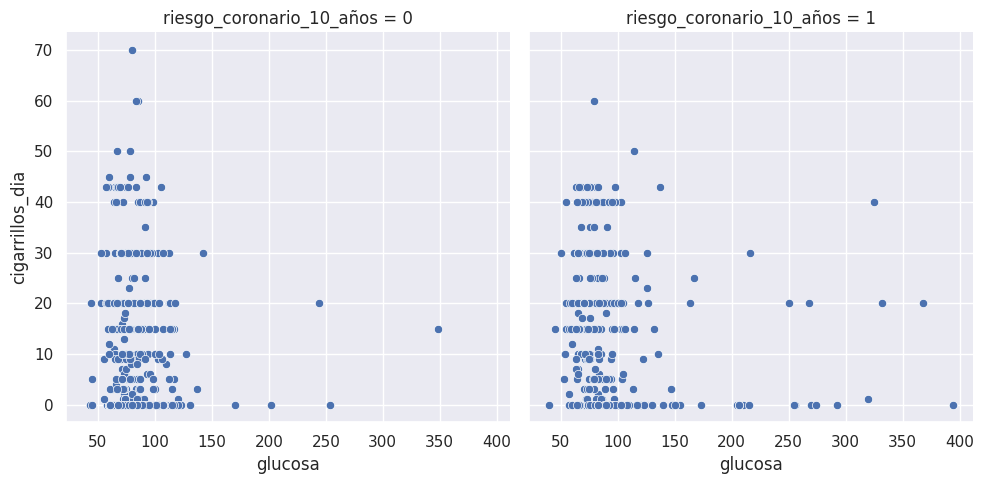


Mostrando gráfico: glucosa vs colesterol_total por clase riesgo_coronario_10_años


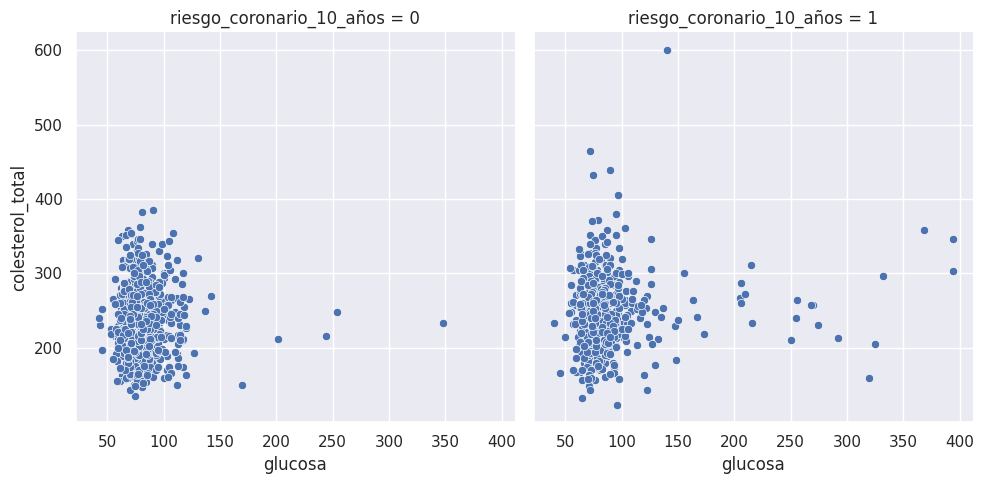


Mostrando gráfico: glucosa vs presion_sistolica por clase riesgo_coronario_10_años


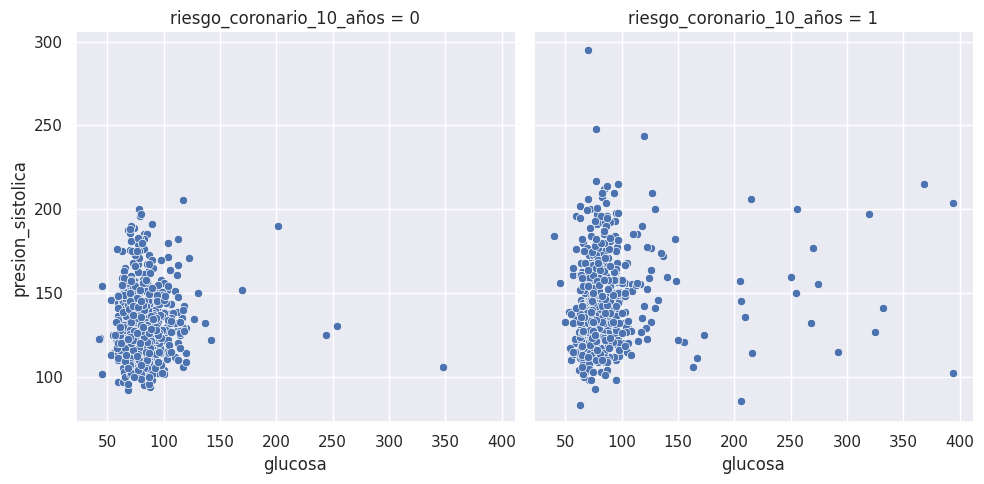


Mostrando gráfico: glucosa vs presion_diastolica por clase riesgo_coronario_10_años


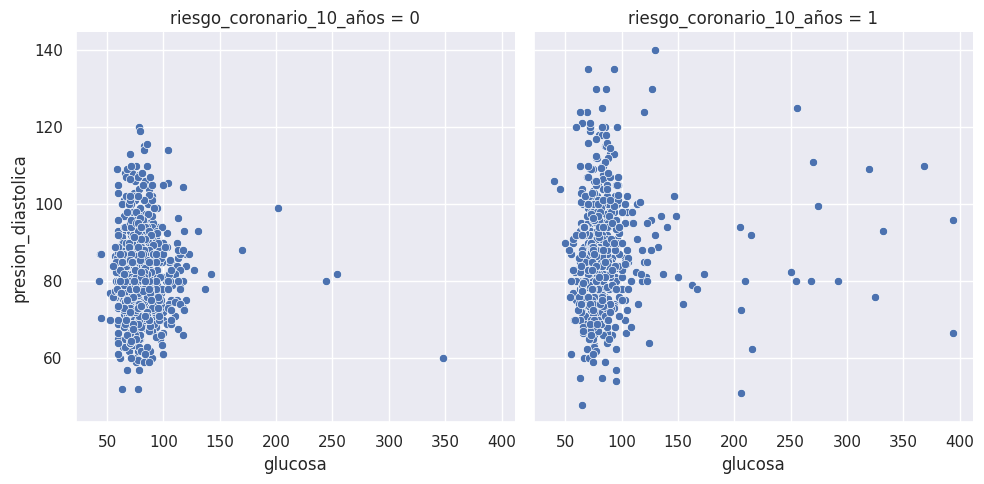


Mostrando gráfico: glucosa vs imc por clase riesgo_coronario_10_años


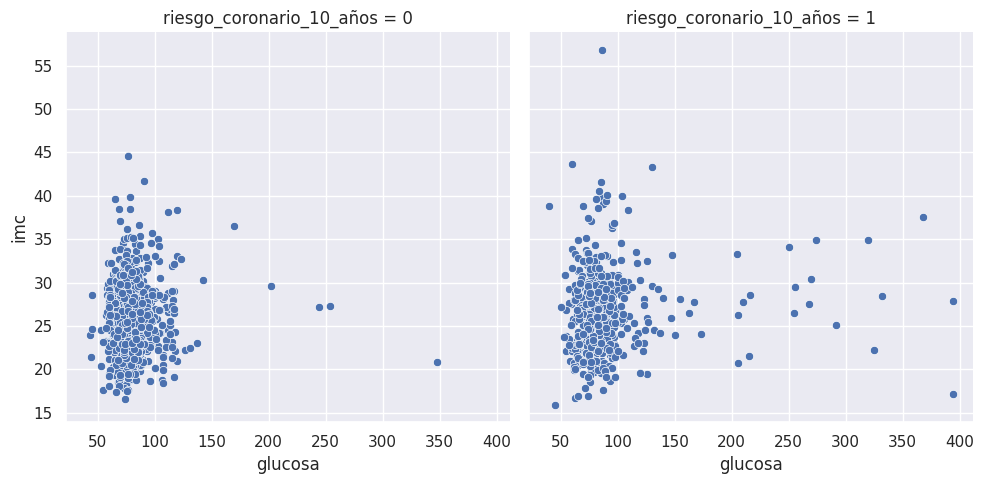


Mostrando gráfico: glucosa vs frecuencia_cardiaca por clase riesgo_coronario_10_años


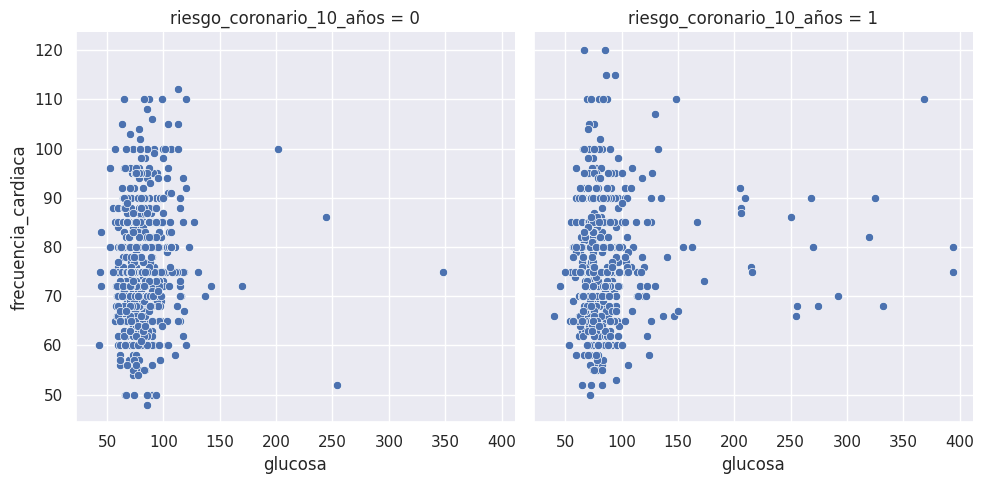

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

listaNumerico = [
    'edad', 'cigarrillos_dia', 'colesterol_total', 'presion_sistolica',
    'presion_diastolica', 'imc', 'frecuencia_cardiaca', 'glucosa'
]

clase = 'riesgo_coronario_10_años'

for colI in listaNumerico:
    for colJ in listaNumerico:
        if colI != colJ:
            print(f'\nMostrando gráfico: {colI} vs {colJ} por clase {clase}')
            sns.relplot(x=colI, y=colJ, col=clase, data=df_limpio, kind='scatter')
            plt.tight_layout()
            plt.show()


RED NEURONAL

Preprocesamiento de datos

In [23]:

X = df_limpio.drop('riesgo_coronario_10_años', axis=1)
y = df_limpio['riesgo_coronario_10_años']

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

Construcción del modelo de Red Neuronal

In [24]:

model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

model.add(Dropout(0.5))

model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

print("\nResumen del modelo:")
model.summary()


Resumen del modelo:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,649 (14.25 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 0 (0.00 B)

ENTRENAMIENTO DEL MODELO

In [31]:
print("\nIniciando el entrenamiento...")

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train,
                    epochs=700,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping], # Añadimos el callback de early stopping
                    verbose=1)
print("Entrenamiento finalizado.")


Iniciando el entrenamiento...
Epoch 1/700
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5961 - loss: 0.6825 - val_accuracy: 0.6620 - val_loss: 0.6273
Epoch 2/700
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6183 - loss: 0.6682 - val_accuracy: 0.6620 - val_loss: 0.6273
Epoch 3/700
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6162 - loss: 0.6500 - val_accuracy: 0.6620 - val_loss: 0.6269
Epoch 4/700
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6284 - loss: 0.6361 - val_accuracy: 0.6620 - val_loss: 0.6267
Epoch 5/700
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6182 - loss: 0.6522 - val_accuracy: 0.6573 - val_loss: 0.6265
Epoch 6/700
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6233 - loss: 0.6452 - val_accuracy: 0.6620 - val_loss: 0.6263
Epoch 7/700
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6180 - loss: 0.6620 - val_accuracy: 0.6620 - val_loss: 0.6263
Epoch 8/700
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6347 - loss: 

EVALUACION

In [32]:
print("\nEvaluando el modelo con los datos de prueba...")
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nPérdida en el conjunto de prueba: {loss:.4f}')
print(f'Precisión  en el conjunto de prueba: {accuracy*100:.2f}%')


Evaluando el modelo con los datos de prueba...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6470 - loss: 0.6203 

Pérdida en el conjunto de prueba: 0.6095
Precisión  en el conjunto de prueba: 67.79%


GRAFICOS DE PERDIDA Y PRECISION

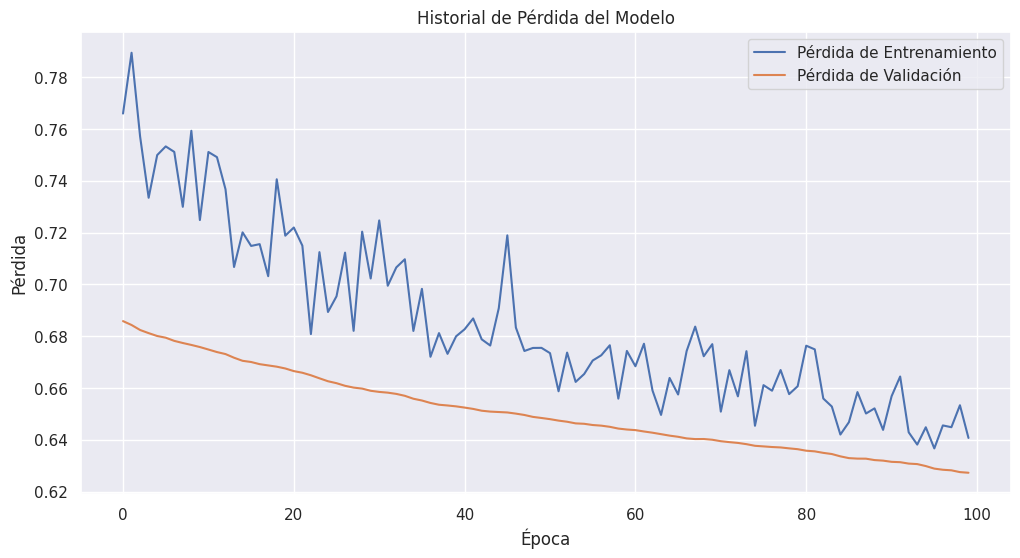

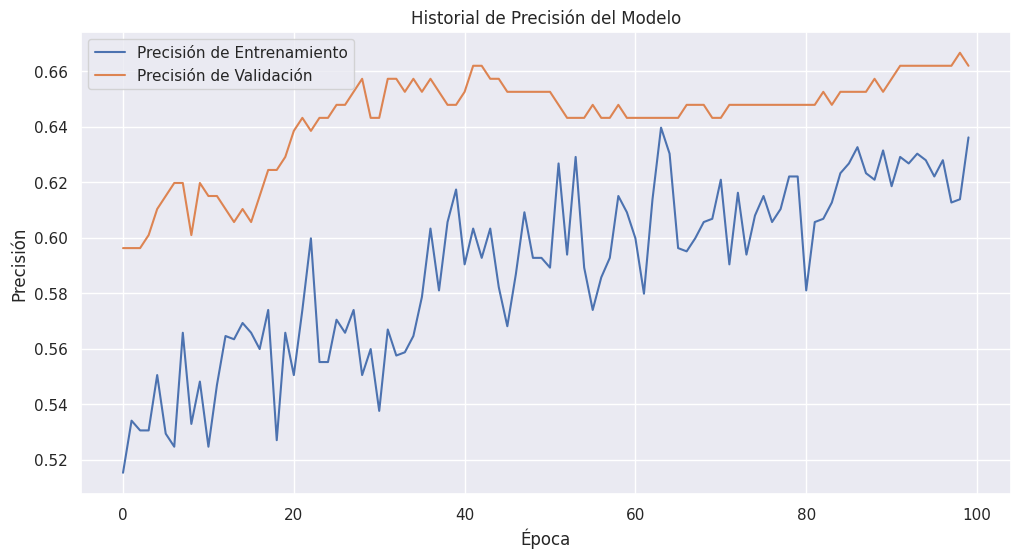

In [28]:
# Gráfico de pérdida
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Historial de Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de precisión
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Historial de Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()